In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('/content/employee_promotion.csv')
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


# EDA

In [ ]:
data.shape

(54808, 13)

In [ ]:
data.head(10).style.background_gradient(cmap = 'copper')

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.000000,8,0,49.000000,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.000000,4,0,60.000000,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.000000,7,0,50.000000,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.000000,10,0,50.000000,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.000000,2,0,73.000000,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.000000,7,0,85.000000,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.000000,5,0,59.000000,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.000000,6,0,63.000000,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.000000,5,0,83.000000,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.000000,5,0,54.000000,0


In [ ]:
data.describe().style.background_gradient(cmap = 'ocean')

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,52248.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.712238,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.521910,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [ ]:
data.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

In [ ]:
data.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
awards_won                  2
avg_training_score         59
is_promoted                 2
dtype: int64

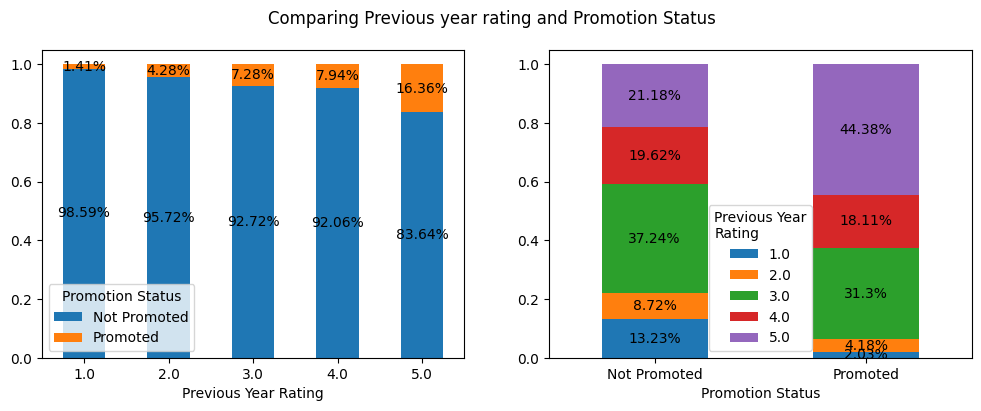

In [ ]:
# Karthik
fig, axes = plt.subplots(1,2,figsize = (12,4))

data.groupby(by = 'previous_year_rating')['is_promoted'].value_counts(normalize = True).unstack('is_promoted').plot(kind = 'bar', stacked = True, ax = axes[0])
axes[0].tick_params(axis = 'x', rotation = 0)
for c in axes[0].containers:
    labels = [str(np.round(v.get_height()*100, 2)) + '%' if v.get_height() > 0 else '' for v in c]
    axes[0].bar_label(c, labels = labels, label_type='center')
axes[0].legend(loc = 'lower left', title='Promotion Status', labels=['Not Promoted', 'Promoted'])
axes[0].set_xlabel('Previous Year Rating')
    
data.groupby(by = 'is_promoted')['previous_year_rating'].value_counts(normalize = True).unstack('previous_year_rating').plot(kind = 'bar', stacked = True, ax = axes[1])
axes[1].tick_params(axis = 'x', rotation = 0)
for c in axes[1].containers:
    labels = [str(np.round(v.get_height()*100, 2)) + '%' if v.get_height() > 0 else '' for v in c]
    axes[1].bar_label(c, labels = labels, label_type='center')
axes[1].legend(title = 'Previous Year\nRating')
axes[1].set_xlabel('Promotion Status')
axes[1].set_xticks(ticks = [0,1], labels=['Not Promoted', 'Promoted'])

plt.suptitle('Comparing Previous year rating and Promotion Status')
plt.show()

- The higher the rating, the more likely that the person is promoted
- People with a rating of 5.0 are 
    - over 11 times more likely to get promoted than people with a rating of 1.0
    - almost 4 times as likely to get promoted than people with a rating of 2.0
    - over twice as likely to get promoted than people with a rating of 4.0 or 3.0
- 44% of those promoted had a previous year rating of 5.0
- Over 60% of those promoted had a previous year rating of 4.0 or 5.0

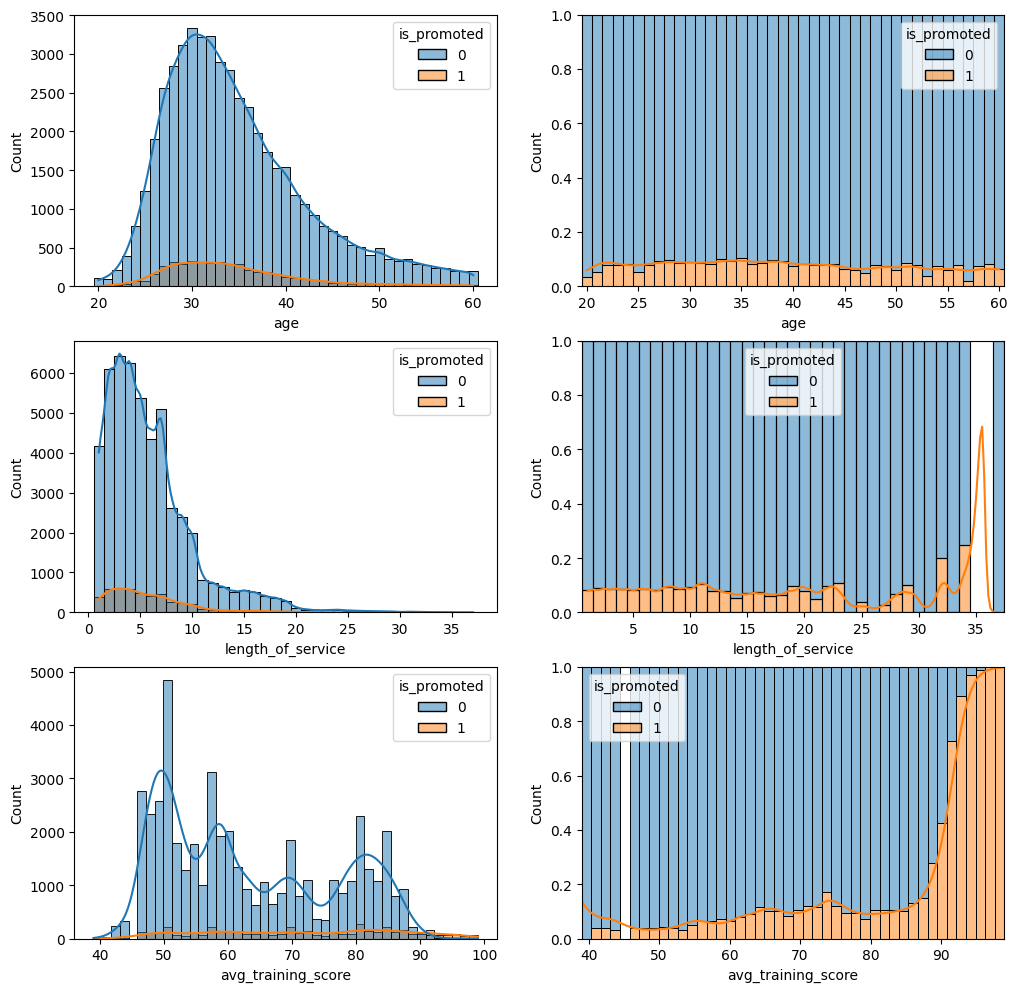

In [ ]:
# Karthik
fig, axes = plt.subplots(3,2,figsize = (12,12))

sns.histplot(data, x = 'age', hue = 'is_promoted', kde = True, discrete = True, ax = axes[0][0])
sns.histplot(data, x = 'age', hue = 'is_promoted', multiple = 'fill', ax = axes[0][1], discrete=True, kde = True)

sns.histplot(data, x = 'length_of_service', hue = 'is_promoted', discrete = True, kde = True, ax = axes[1][0])
sns.histplot(data, x = 'length_of_service', hue = 'is_promoted', multiple = 'fill', ax = axes[1][1], discrete=True, kde = True)

sns.histplot(data, x = 'avg_training_score', hue = 'is_promoted', kde = True, ax = axes[2][0])
sns.histplot(data, x = 'avg_training_score', hue = 'is_promoted', multiple = 'fill', ax = axes[2][1], kde = True)

plt.show()

- Age and length of service does not show a strong correlation with whether someone is promoted
- People with an average training score > 90 are much more likely to get promoted than others

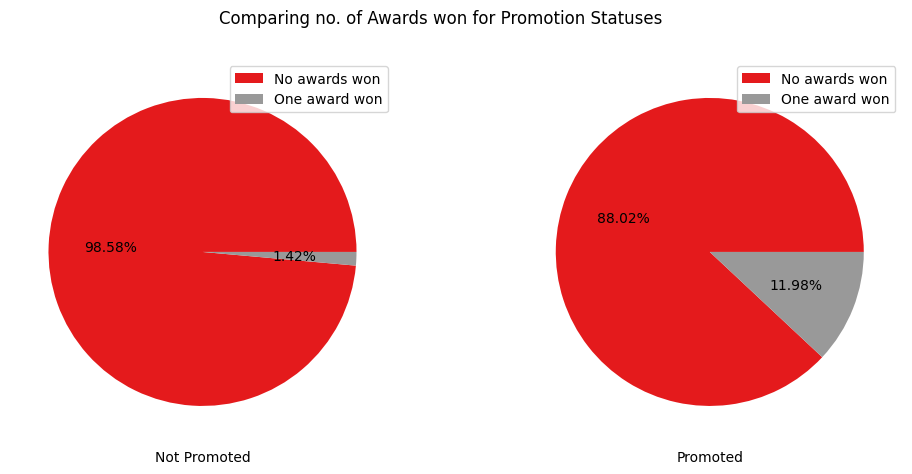

In [ ]:
# Karthik
axes = data.groupby(by = 'awards_won')['is_promoted'].value_counts().unstack('is_promoted').plot.pie(subplots=True, autopct = '%.2f%%', figsize = (12,5), colormap = 'Set1', labeldistance=None)
for ax in axes:
    ax.legend(['No awards won', 'One award won'], loc = 'upper right')
    ax.set_ylabel('')
axes[0].set_xlabel('Not Promoted')
axes[1].set_xlabel('Promoted')
plt.suptitle('Comparing no. of Awards won for Promotion Statuses')
plt.show()

- People who are promoted are over 8 times more likely to have won an award

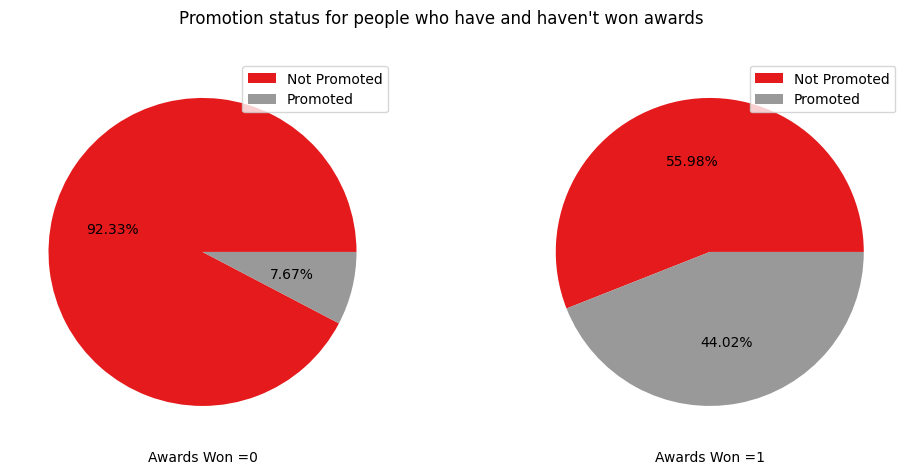

In [ ]:
# Karthik
axes = data.groupby(by = 'is_promoted')['awards_won'].value_counts().unstack('awards_won').plot.pie(subplots=True, autopct = '%.2f%%', figsize = (12,5), colormap = 'Set1', labeldistance=None)
for ax in axes:
    ax.set_xlabel("Awards Won =" + ax.get_ylabel())
    ax.set_ylabel("")
    ax.legend(['Not Promoted', 'Promoted'], loc = 'upper right')
plt.suptitle("Promotion status for people who have and haven't won awards")
plt.show()

- Almost half of those who have won awards have been promoted
- People who have won an award are over 6 times more likely to be promoted than people who have not won an award

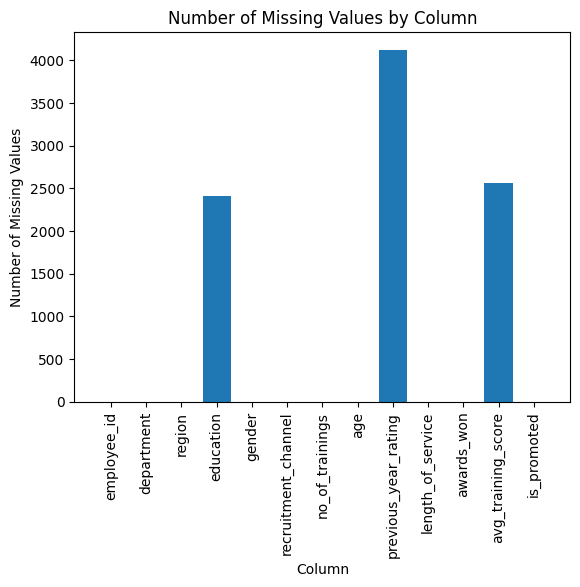

In [ ]:
#ARATHI
null_counts = data.isna().sum()
plt.bar(null_counts.index, null_counts.values)
plt.xlabel('Column')
plt.ylabel('Number of Missing Values')
plt.title('Number of Missing Values by Column')
plt.xticks(rotation=90)
plt.show()

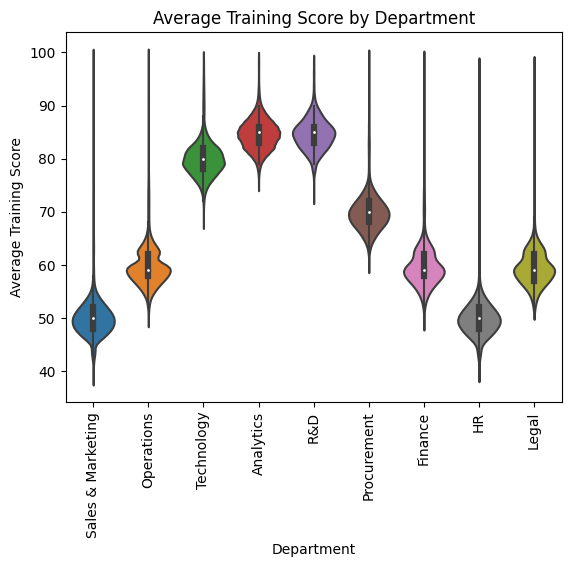

In [ ]:
sns.violinplot(x='department', y='avg_training_score', data=data)
plt.xlabel('Department')
plt.ylabel('Average Training Score')
plt.title('Average Training Score by Department')
plt.xticks(rotation=90)
plt.show()

- There is a wide range of average training scores across different departments. The violins for some departments are wider than others,indicating that there is more variability in average training scores within those departments.
- The median average training score for each department is different. 
- The distribution of average training scores is not symmetrical for most departments.

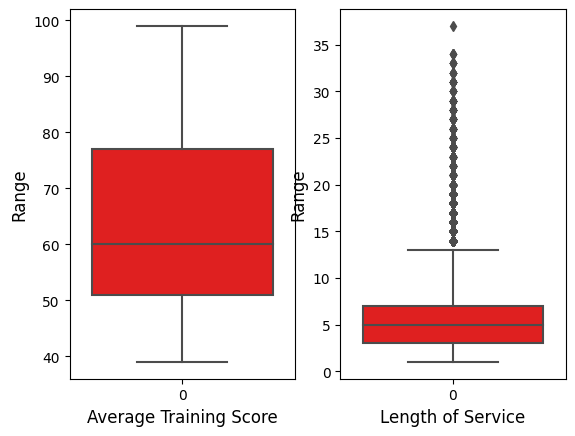

In [ ]:
plt.subplot(1, 2, 1)
sns.boxplot(data['avg_training_score'], color = 'red')
plt.xlabel('Average Training Score', fontsize = 12)
plt.ylabel('Range', fontsize = 12)
plt.subplot(1, 2, 2)
sns.boxplot(data['length_of_service'], color = 'red')
plt.xlabel('Length of Service', fontsize = 12)
plt.ylabel('Range', fontsize = 12)
plt.show()

- The median training score is around 60, indicating that half of the employees scored above 60 and half scored below 60.
- The distribution of training scores is roughly symmetric, with no significant skewness towards either high or low scores.
- The box plot shows that the majority of the scores fall between approximately 50 and 75, with some variability in the middle 50% of the data (i.e., the interquartile range).

In [ ]:
#The median length of service is around 5 years, indicating that half of the employees have worked for the company for more than 5 years and half for less than 5 years.
#The distribution of length of service is slightly skewed to the right, with a longer tail of higher values.
#The box plot shows that the majority of the lengths of service fall between approximately 2 and 7 years, with some variability in the middle 50% of the data (i.e., the interquartile range).
#The plot shows several outliers in the distribution, with a few employees having worked for the company for more than 15 years.

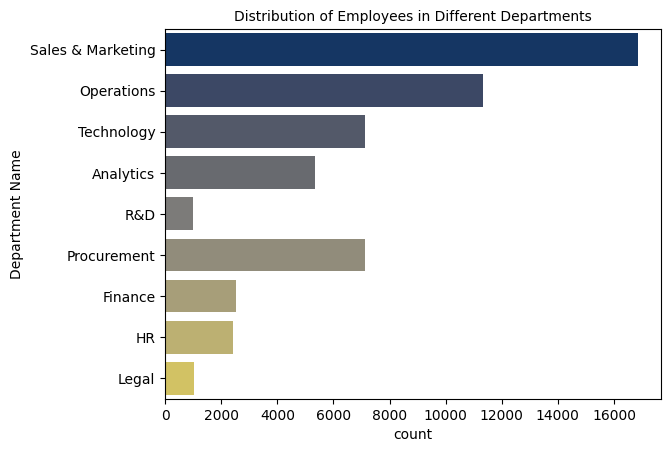

In [ ]:
sns.countplot(y = data['department'], palette = 'cividis', orient = 'v')
plt.ylabel('Department Name')
plt.title('Distribution of Employees in Different Departments', fontsize = 10)
plt.show()

- Based on the chart, we can see that the largest department is Sales & Marketing,
- with more than 23,000 employees, followed by Operations, with around 17,000 employees.
- Finance, HR,R&D and Legal are smaller departments, each with less than 7,000 employees.

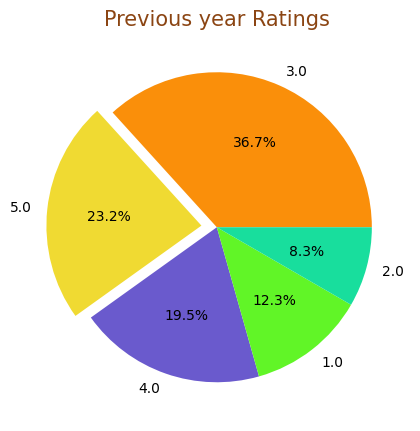

In [ ]:
label=data.previous_year_rating.value_counts().index
count=data.previous_year_rating.value_counts().values
color = ['#FA8F0A','#F0DA32','slateblue','#61F527','#18DE9D','#3594FF', 'orange', '#8B5A8C', 'g']
explode = (0, 0.1, 0, 0, 0)
plt.figure(1, figsize=(5,10))
plt.pie(count, labels=label, colors=color, autopct='%1.1f%%', explode=explode)
plt.title("Previous year Ratings",color="saddlebrown",fontsize=15)
plt.show()


- From the pie chart, we can see that most employees in the dataset had a previous year rating of either 3 (36.7%) or 5 (23.2%).
- The ratings of 1 and 2 were less common. This suggests that most employees in the dataset were performing satisfactorily, 
- with a moderate to high level of performance rating in the previous year. 

<Axes: xlabel='age', ylabel='Count'>

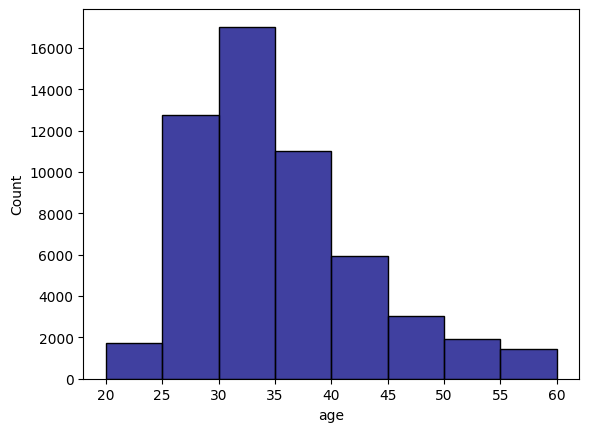

In [ ]:
sns.histplot(data['age'],label=True,binwidth=5,color='navy')

- Dataset contains more number of people who have age in between 30 and 35

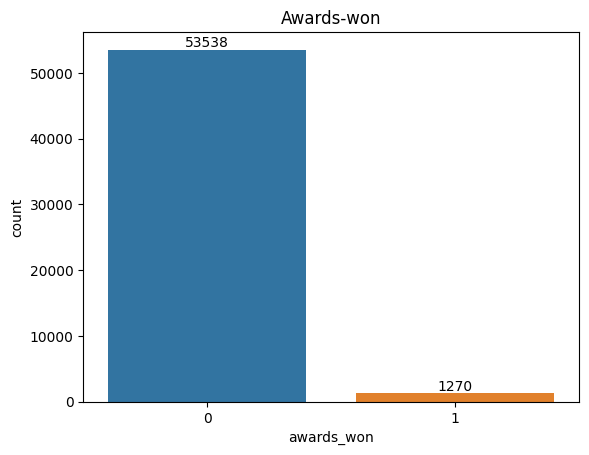

In [ ]:
ax = sns.countplot(data = data,x='awards_won')
plt.title('Awards-won')
x = ax.bar_label(ax.containers[0])

- A very small set of employees have actually won awards, around 1270 people

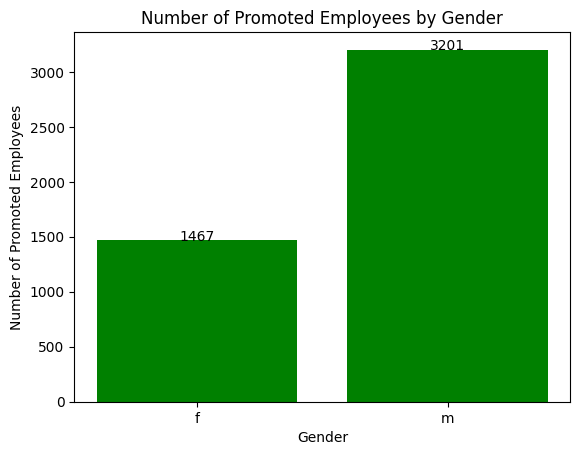

In [ ]:
promoted_by_gender = data[data['is_promoted'] == 1].groupby('gender').size()
plt.bar(promoted_by_gender.index, promoted_by_gender.values,color='green')
plt.xlabel('Gender')
plt.ylabel('Number of Promoted Employees')
plt.title('Number of Promoted Employees by Gender')
for i, v in enumerate(promoted_by_gender.values):
    plt.text(i, v+1, str(v), ha='center')
plt.show()


- The number of promoted male employees is higher than the number of promoted female employees. 

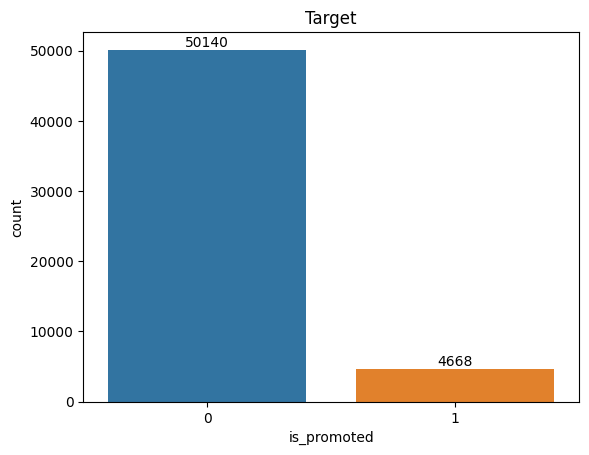

In [ ]:
ax = sns.countplot(data = data,x='is_promoted')
plt.title('Target')
x = ax.bar_label(ax.containers[0])

- considering the entire dataset a very small set of employees is promoted 

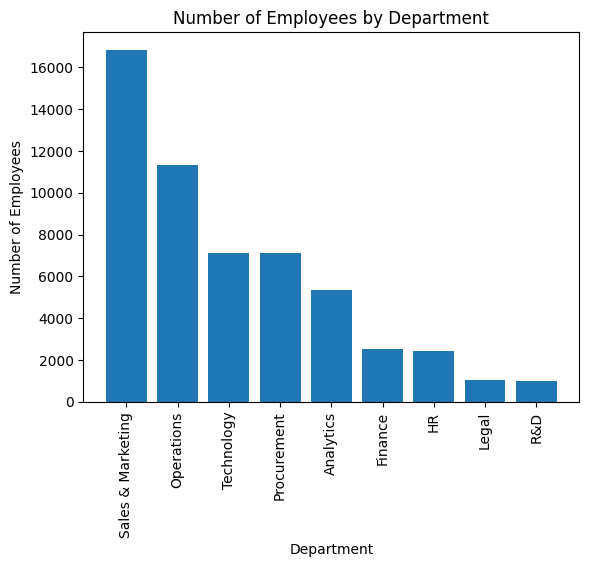

In [ ]:
# Count the number of employees in each department
employee_counts = data['department'].value_counts()

fig, ax = plt.subplots()
ax.bar(employee_counts.index, employee_counts.values)

# Set the labels and title of the chart
ax.set_xlabel('Department')
ax.set_ylabel('Number of Employees')
ax.set_title('Number of Employees by Department')

plt.xticks(rotation=90)

plt.show()

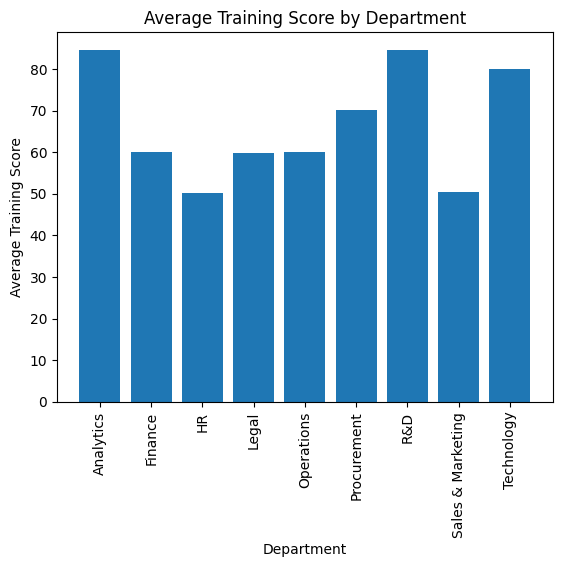

In [ ]:
# Group the data by department and calculate the mean of the training score
grouped_data = data.groupby('department')['avg_training_score'].mean()

fig, ax = plt.subplots()
ax.bar(grouped_data.index, grouped_data.values)

# Set the labels and title of the chart
ax.set_xlabel('Department')
ax.set_ylabel('Average Training Score')
ax.set_title('Average Training Score by Department')

# Rotate the x-axis labels if needed
plt.xticks(rotation=90)

plt.show()

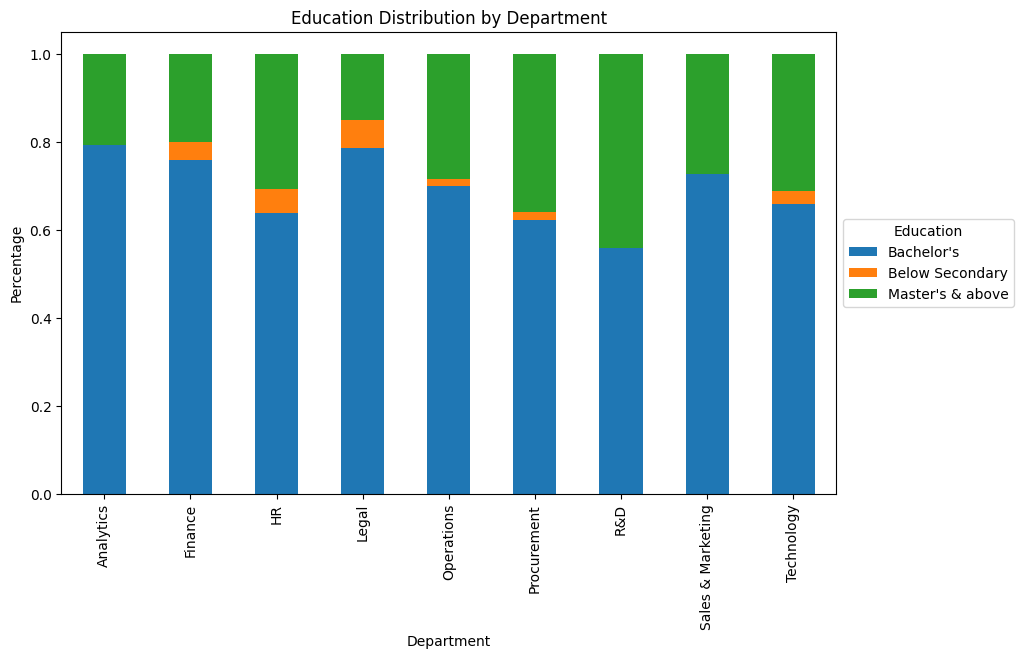

In [ ]:
edu_dept = pd.crosstab(data.department, data.education, normalize='index')
edu_dept.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Department')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.xticks(rotation=90)
plt.legend(title='Education', loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Education Distribution by Department')
plt.show()

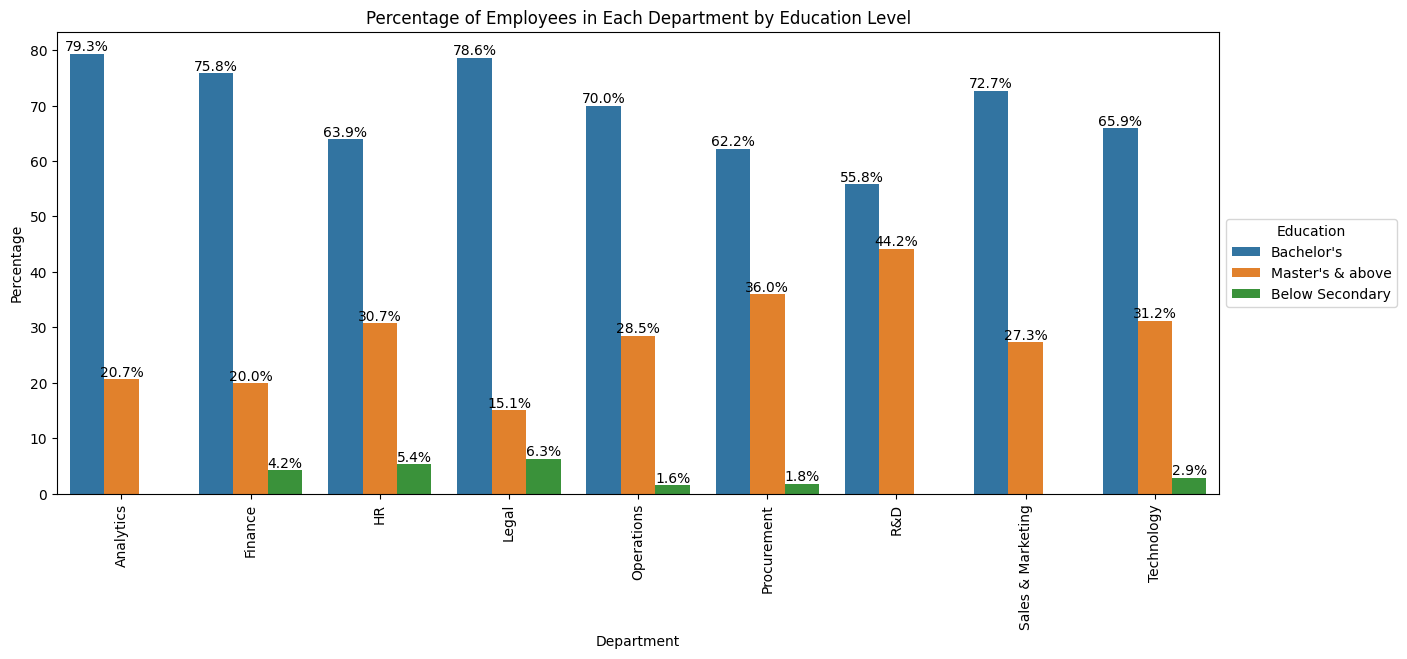

In [ ]:
# create a new DataFrame with the percentage of employees in each department and education level
edu_dept = data.groupby(['department', 'education'])['employee_id'].count().reset_index()
edu_dept['percent'] = edu_dept.groupby('department')['employee_id'].apply(lambda x: x / x.sum() * 100)

# sort the DataFrame in descending order of the most number of employees in each field of education
edu_dept = edu_dept.sort_values(['department', 'employee_id'], ascending=[True, False])

# plot the graph using seaborn
plt.figure(figsize=(15,6))
ax = sns.barplot(x='department', y='percent', hue='education', data=edu_dept)
plt.title('Percentage of Employees in Each Department by Education Level')
plt.xlabel('Department')
plt.ylabel('Percentage')
plt.legend(title='Education', loc='center left', bbox_to_anchor=(1, 0.5))

# add percentage labels to each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)
                
plt.xticks(rotation=90)
plt.show()

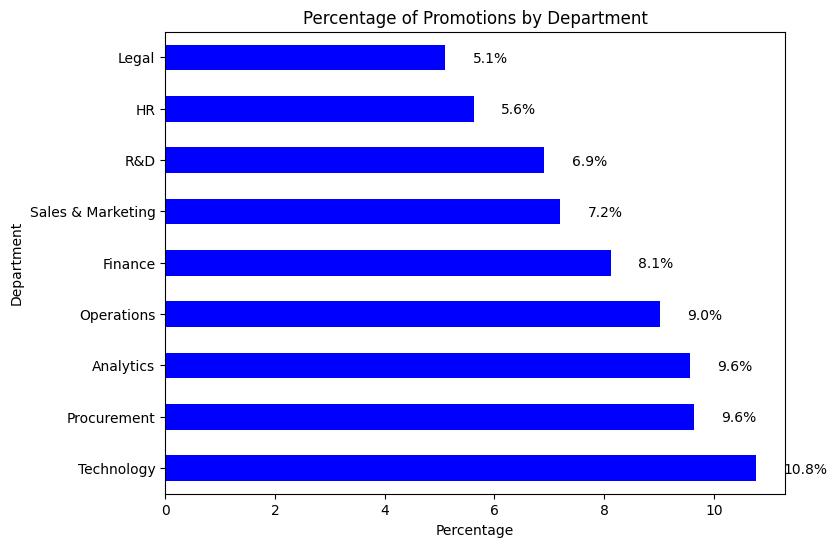

In [ ]:
# calculate the percentage of promotions for each department
dept_promotions = data[data['is_promoted']==1].groupby('department')['employee_id'].count() / data.groupby('department')['employee_id'].count() * 100
dept_promotions = dept_promotions.sort_values(ascending=False)

# plot the graph
plt.figure(figsize=(8,6))
ax = dept_promotions.plot(kind='barh', color='blue')
ax.set_title('Percentage of Promotions by Department')
ax.set_xlabel('Percentage')
ax.set_ylabel('Department')

# label the bars with their percentage values
for i, v in enumerate(dept_promotions):
    ax.text(v + 0.5, i - 0.1, str(round(v, 1))+'%', color='black', fontsize=10)

plt.show()

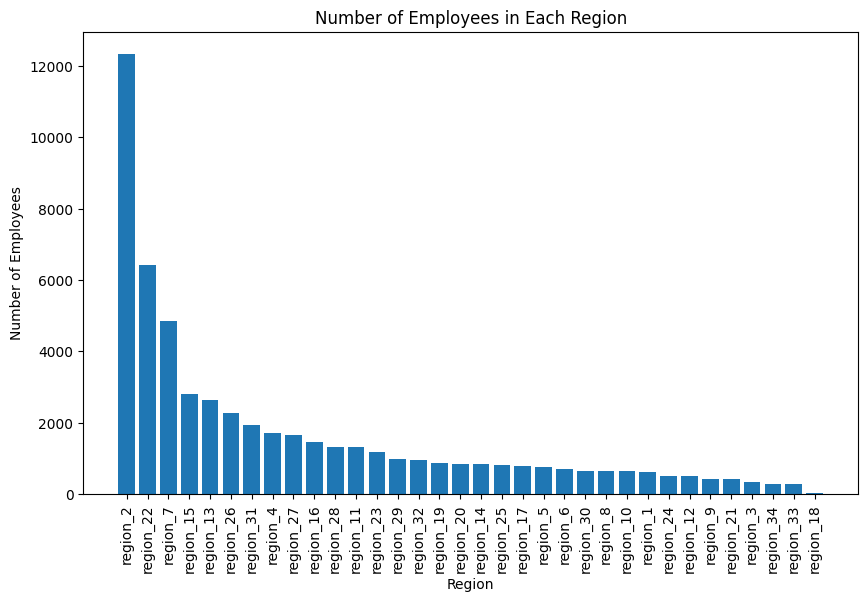

In [ ]:
# Count the number of employees in each region
region_counts = data['region'].value_counts()

# Create a bar chart of the region counts
plt.figure(figsize=(10,6))
plt.bar(region_counts.index, region_counts.values)
plt.title('Number of Employees in Each Region')
plt.xlabel('Region')
plt.ylabel('Number of Employees')
plt.xticks(rotation=90)
plt.show()


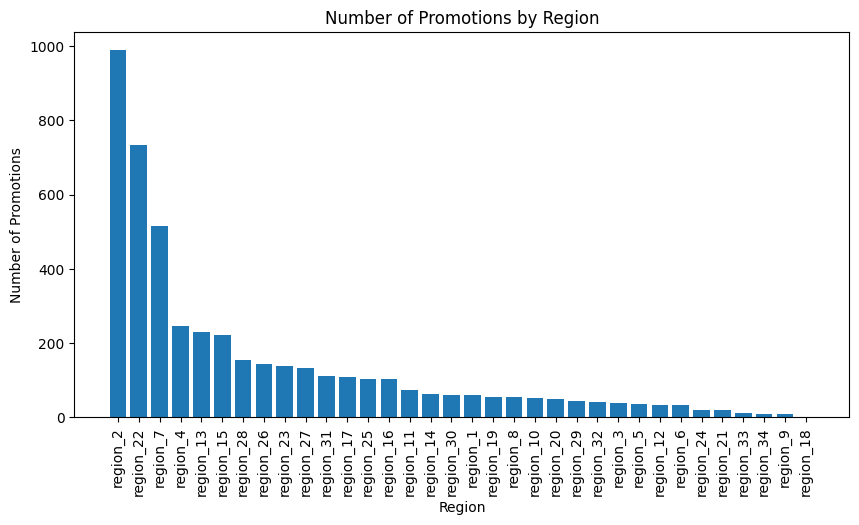

In [ ]:
# Group the data by region and calculate the number of promotions in each region
promotions_by_region = data.loc[data['is_promoted'] == 1].groupby('region')['is_promoted'].count()

# Sort the data by the number of promotions in descending order
promotions_by_region = promotions_by_region.sort_values(ascending=False)

# Create a horizontal bar plot of the data
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(promotions_by_region.index, promotions_by_region.values)

# Set the labels and title of the chart
ax.set_xlabel('Region')
ax.set_ylabel('Number of Promotions')
ax.set_title('Number of Promotions by Region')

plt.xticks(rotation=90)

# Display the chart
plt.show()

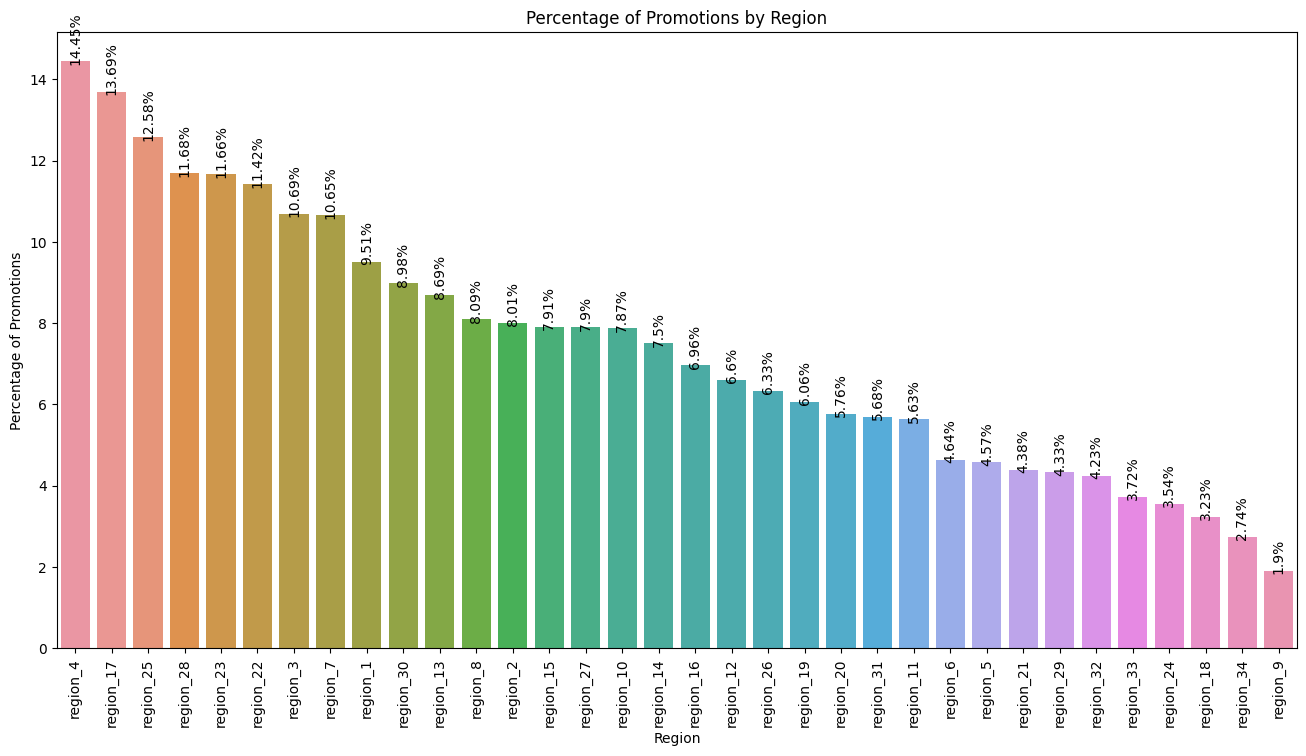

In [ ]:
# calculate the percentage of promotions by region
region_promotions = data[data['is_promoted'] == 1].groupby('region')['employee_id'].count() / data.groupby('region')['employee_id'].count() * 100
region_promotions = region_promotions.dropna().sort_values(ascending=False)

# plot the graph using seaborn
plt.figure(figsize=(16,8))
sns.barplot(x=region_promotions.index, y=region_promotions.values)
plt.title('Percentage of Promotions by Region')
plt.xlabel('Region')
plt.ylabel('Percentage of Promotions')
plt.xticks(rotation=90)
for index, value in enumerate(region_promotions):
    plt.text(index, value, str(round(value,2))+'%', ha='center',rotation=90)
plt.show()


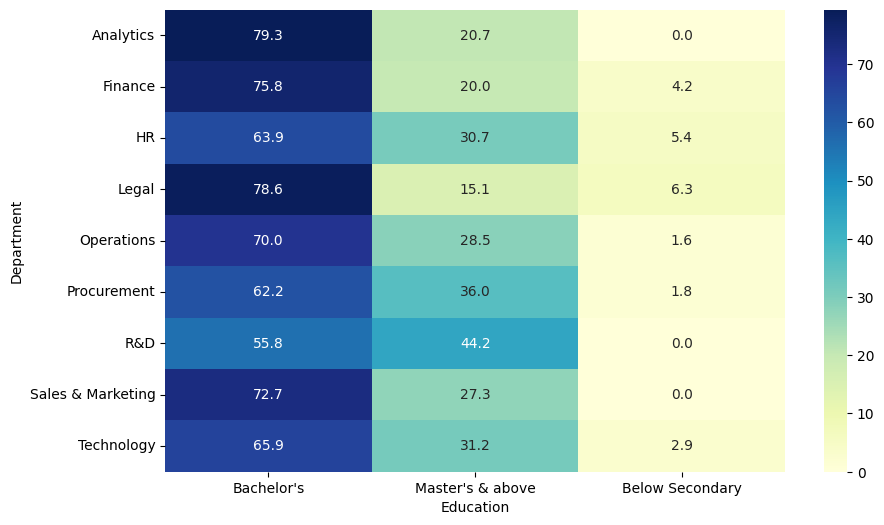

In [ ]:
# Calculate the total number of employees in each education category
edu_counts = data.groupby('education')['employee_id'].count()

# Sort the education categories based on the total number of employees in each category
edu_sorted = edu_counts.sort_values(ascending=False).index

# Create a new DataFrame with the percentage of employees in each education category for each department
dept_edu_percentages = pd.crosstab(index=data['department'], columns=data['education'], normalize='index') * 100

# Plot the graph with departments arranged in descending order of the total number of employees in each education category
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(data=dept_edu_percentages.loc[:, edu_sorted], annot=True, fmt='.1f', cmap='YlGnBu')
ax.set_xlabel('Education')
ax.set_ylabel('Department')
plt.show()


EDA Univariate Analysis

In [ ]:
cat_cols = data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')
Numerical Variables:
['employee_id', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'awards_won', 'avg_training_score', 'is_promoted']


employee_id
Skew : -0.0


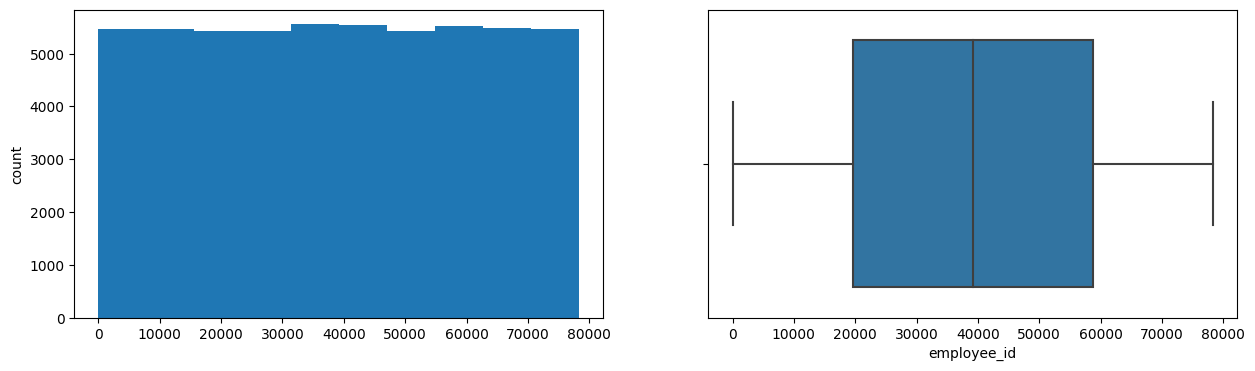

no_of_trainings
Skew : 3.45


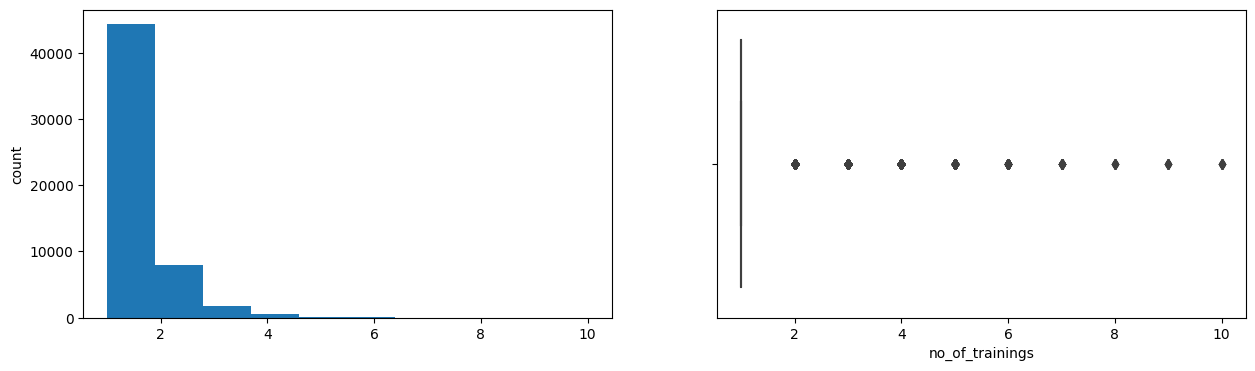

age
Skew : 1.01


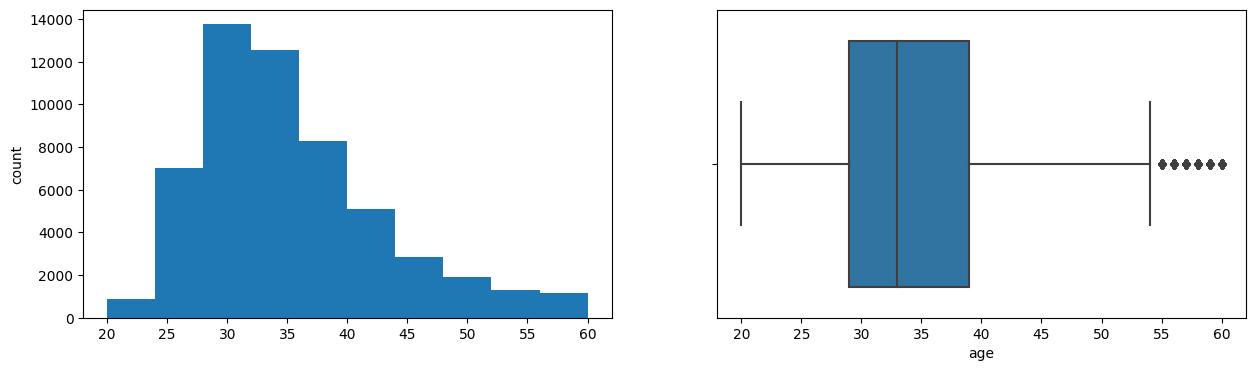

previous_year_rating
Skew : -0.31


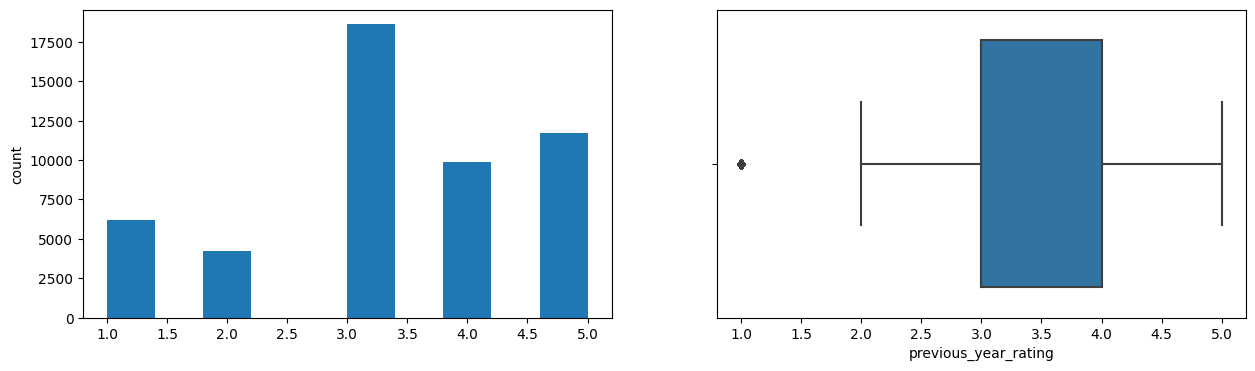

length_of_service
Skew : 1.74


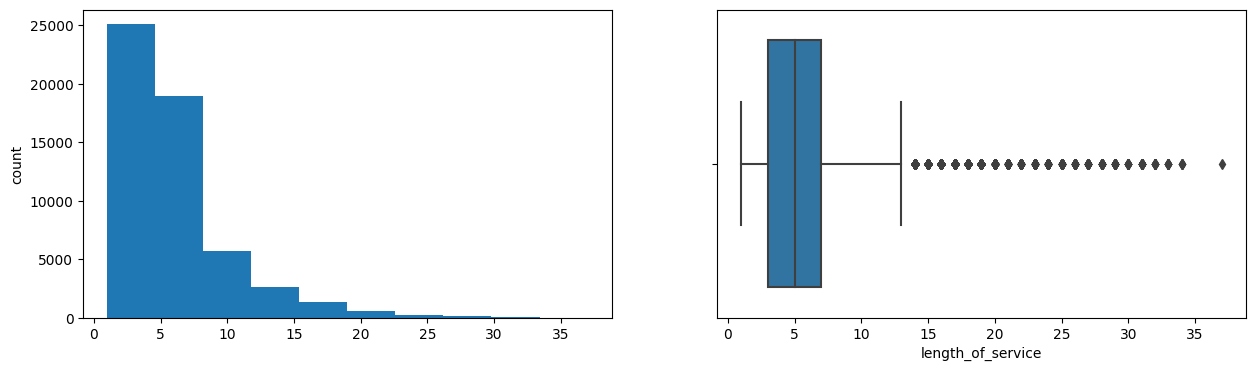

awards_won
Skew : 6.34


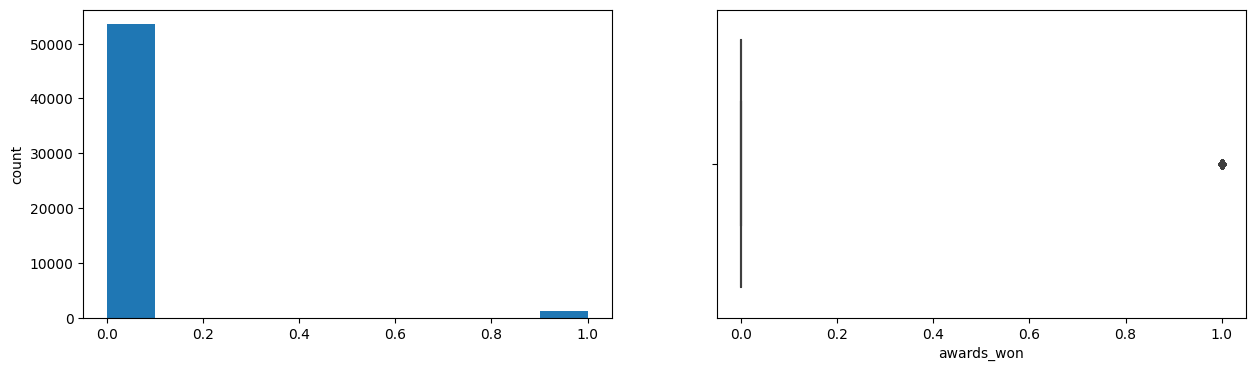

avg_training_score
Skew : 0.42


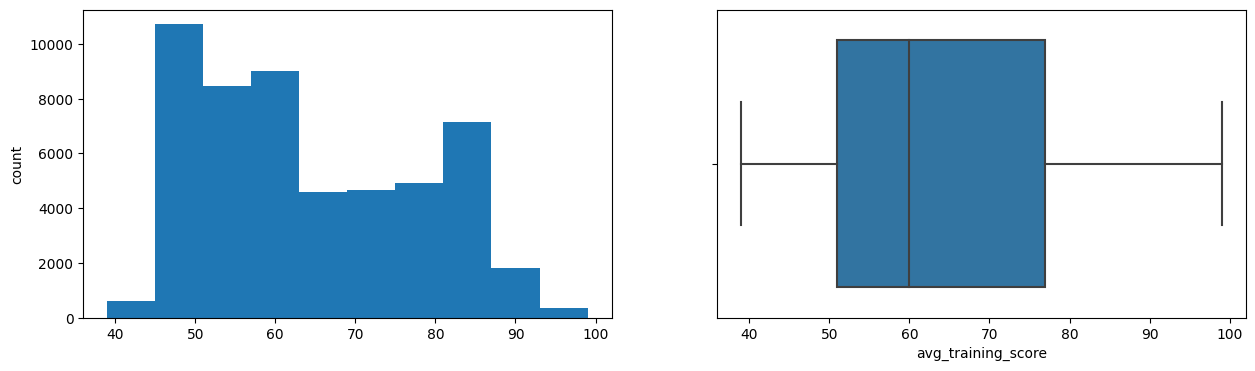

is_promoted
Skew : 2.97


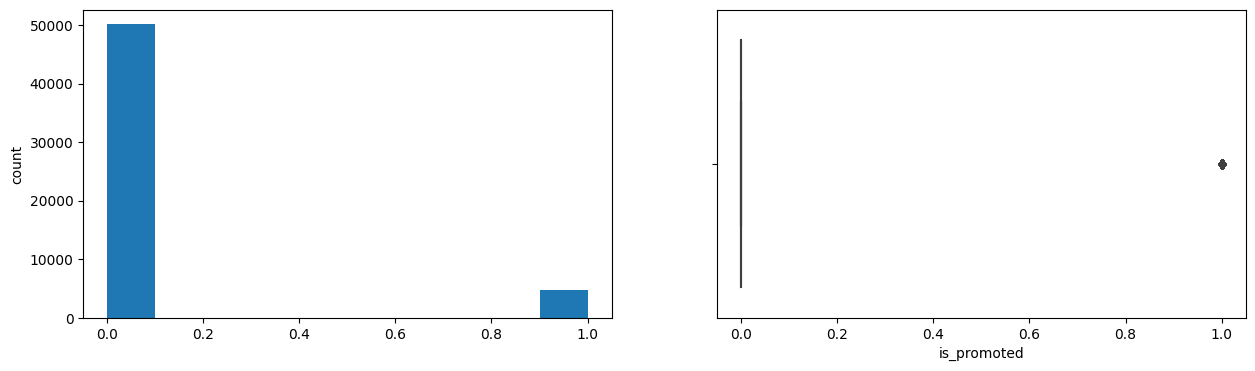

In [ ]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

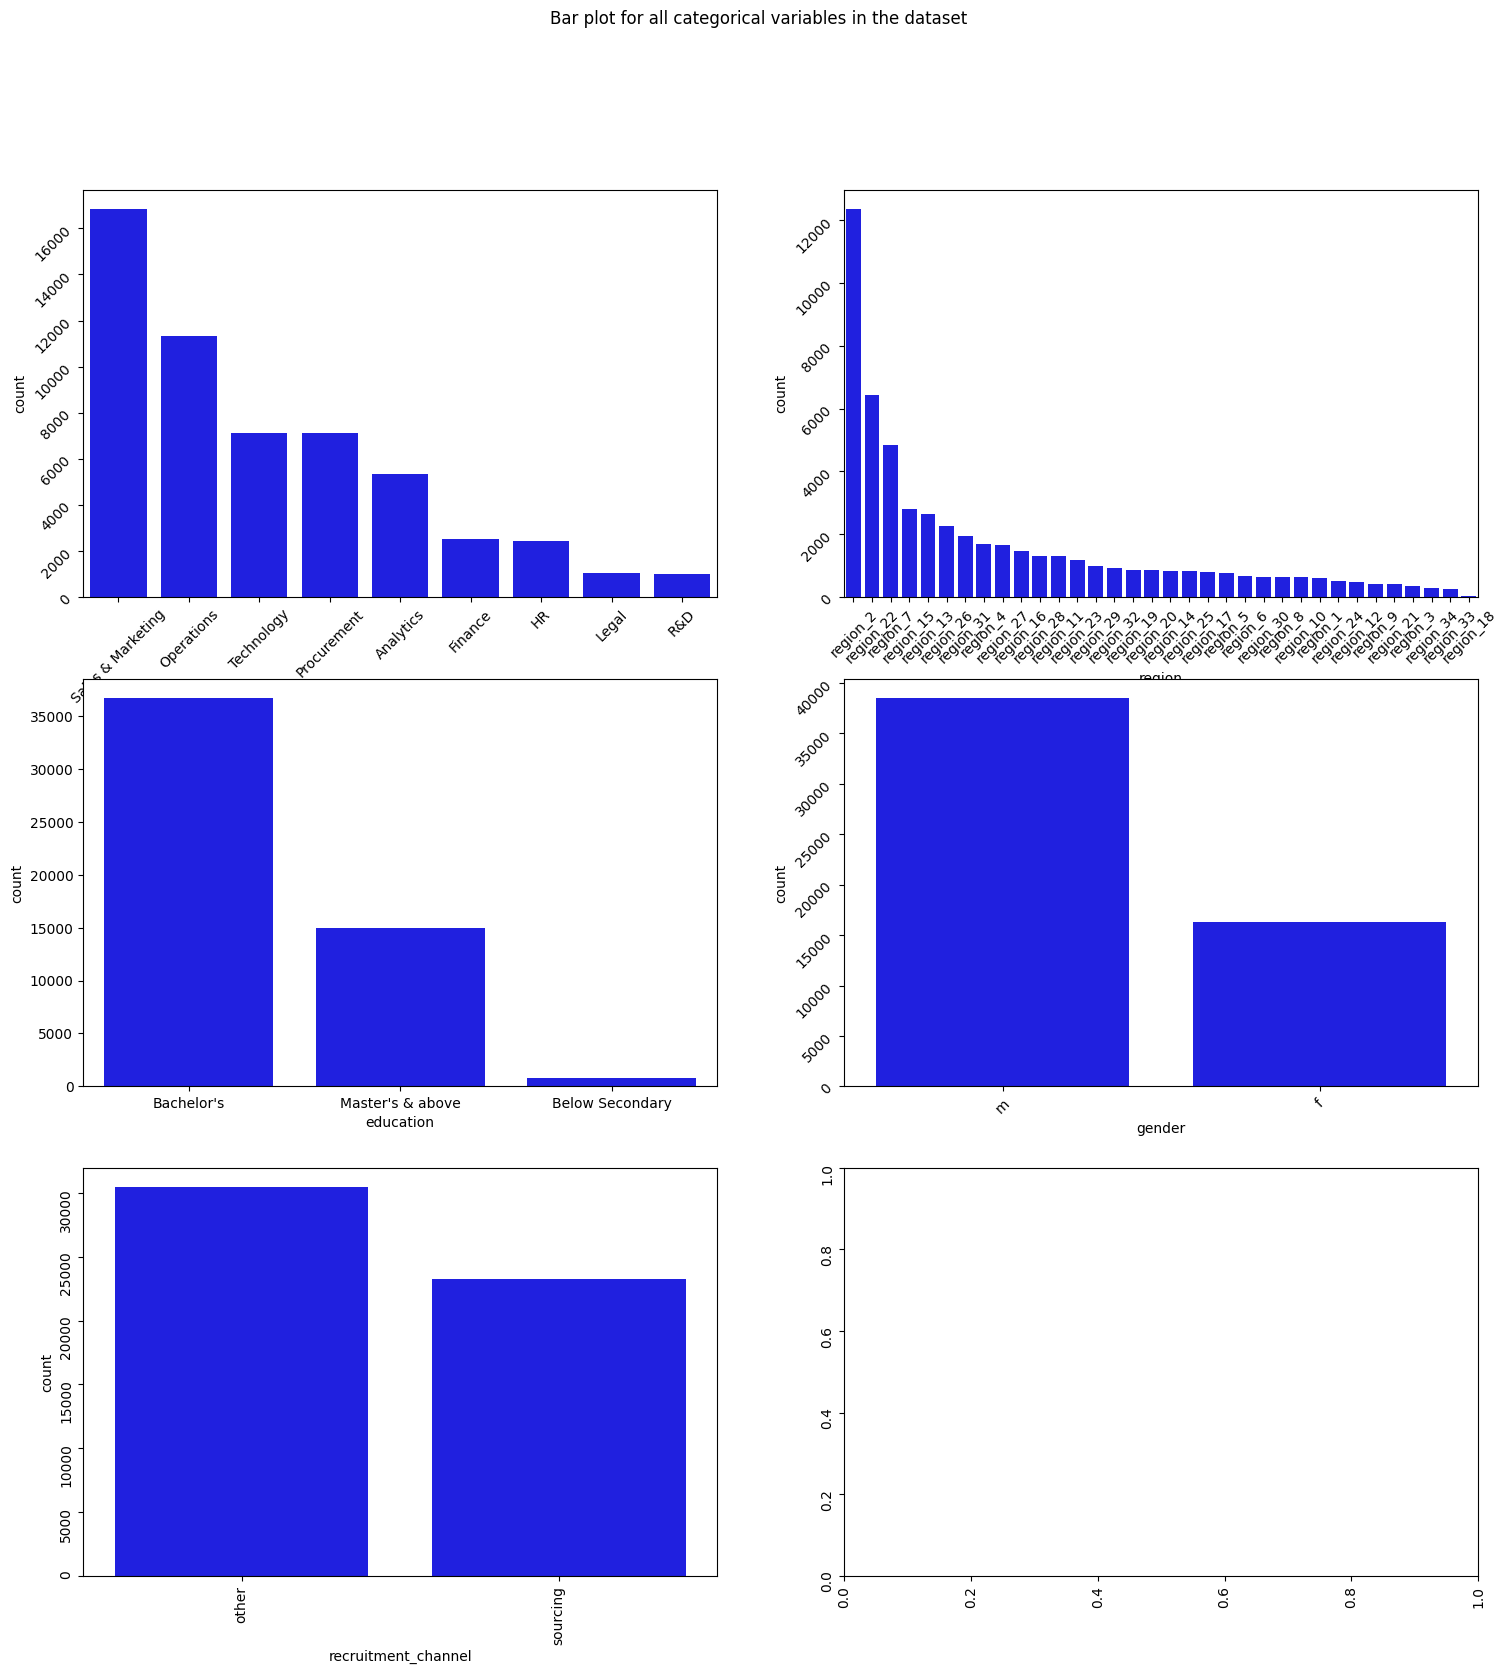

In [ ]:
fig, axes = plt.subplots(3, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'department', data = data, color = 'blue', 
              order = data['department'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'region', data = data, color = 'blue', 
              order = data['region'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'education', data = data, color = 'blue', 
              order = data['education'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'gender', data = data, color = 'blue', 
              order = data['gender'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'recruitment_channel', data = data, color = 'blue', 
              order = data['recruitment_channel'].head(20).value_counts().index);
axes[0][1].tick_params(labelrotation=45);
axes[0][0].tick_params(labelrotation=45);
axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);
plt.show()

<Axes: >

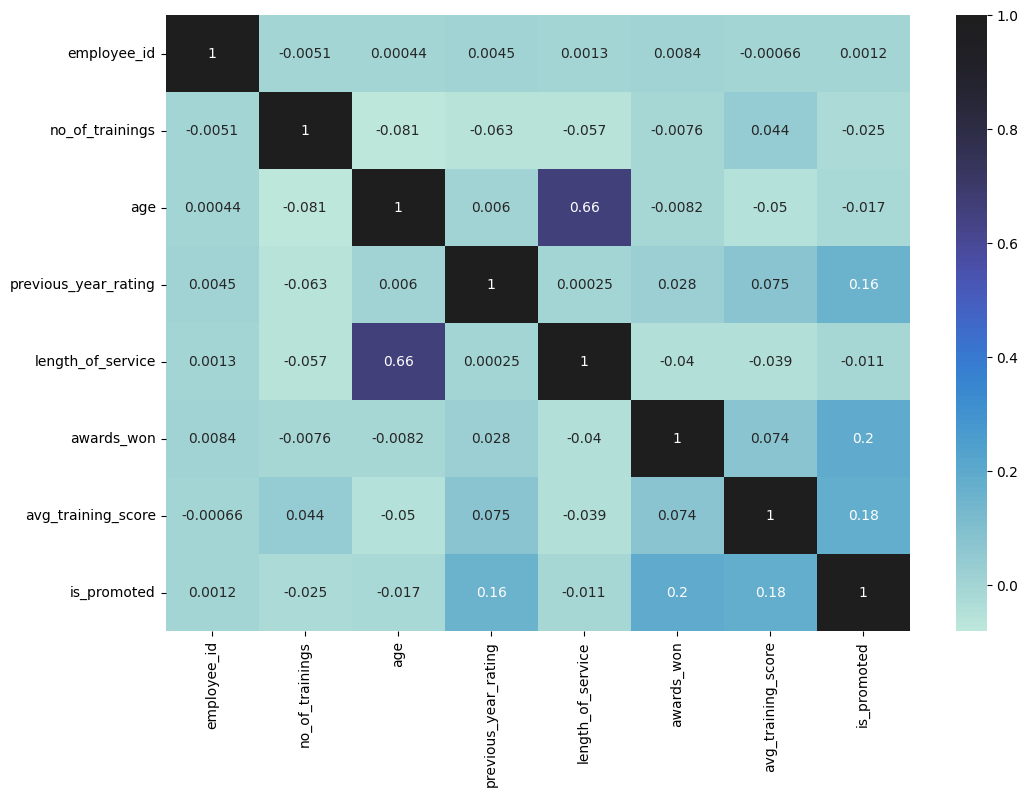

In [ ]:
#adithya
plt.figure(figsize=(12, 8))
sns.heatmap(pd.DataFrame(data, columns=data.columns).corr(), annot=True, center=True)

<Figure size 1200x1000 with 0 Axes>

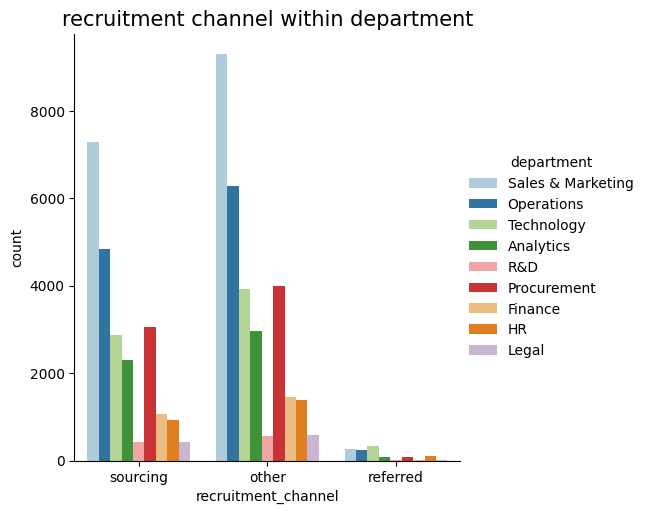

In [ ]:
plt.figure(figsize=(12, 10))
sns.catplot(x ='recruitment_channel', hue='department', kind='count', data=data, palette='Paired')
plt.title('recruitment channel within department', fontsize = 15)
plt.show()

<Figure size 1200x1000 with 0 Axes>

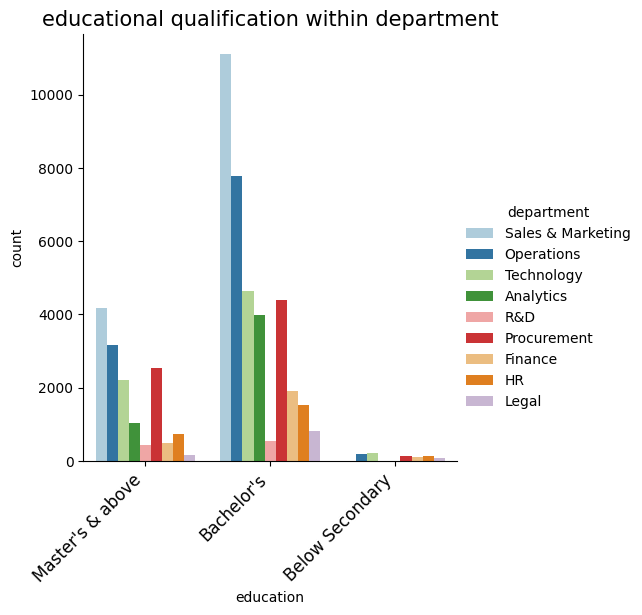

In [ ]:
plt.figure(figsize=(12, 10))
sns.catplot(x ='education', hue='department', kind='count', data=data, palette='Paired')
plt.xticks(rotation=45,size=12, horizontalalignment='right')
plt.title('educational qualification within department', fontsize = 15)
plt.show()

# Preprocessing

## Removing Outliers

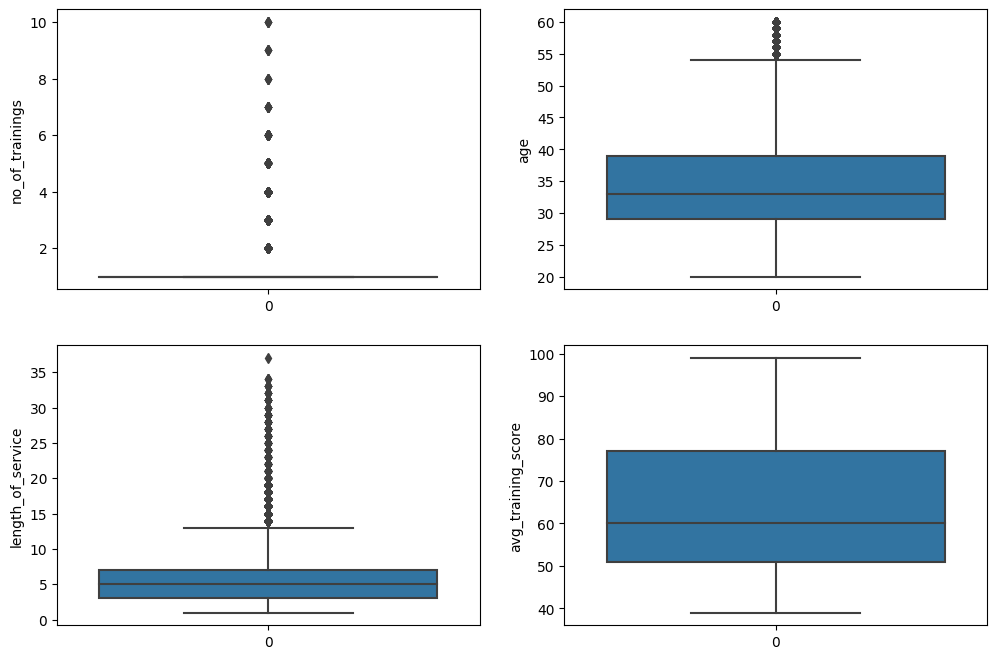

In [ ]:
fig, axes = plt.subplots(2,2, figsize = (12, 8))
sns.boxplot(data['no_of_trainings'], ax = axes[0][0])
axes[0][0].set_ylabel('no_of_trainings')
sns.boxplot(data['age'], ax = axes[0][1])
axes[0][1].set_ylabel('age')
sns.boxplot(data['length_of_service'], ax = axes[1][0])
axes[1][0].set_ylabel('length_of_service')
sns.boxplot(data['avg_training_score'], ax = axes[1][1])
axes[1][1].set_ylabel('avg_training_score')
plt.show()

In [ ]:
for i in ['age', 'length_of_service']:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR=Q3-Q1
    upper_limit=Q3+1.5*IQR
    lower_limit=Q1-1.5*IQR
    data[i].where(data[i] > lower_limit, lower_limit, inplace = True)
    data[i].where(data[i] < upper_limit, upper_limit, inplace = True)

## Removing Null Values

In [ ]:
# Replacing null values in education column with mode
data['education'].fillna(data['education'].mode()[0], inplace = True)
data.isnull().sum()

employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

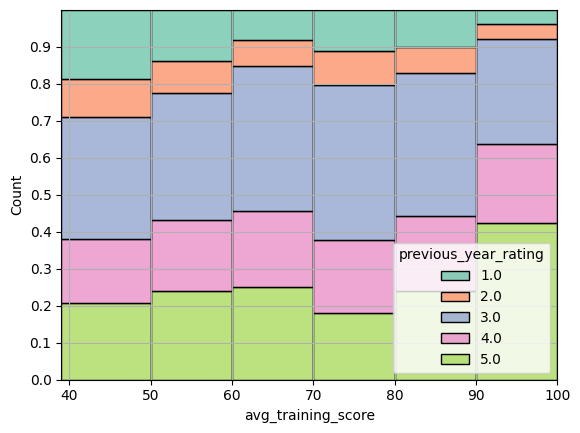

In [ ]:
# Plotting histogram of avg training score seperated by previous year rating
ax = sns.histplot(data, x = 'avg_training_score', hue = 'previous_year_rating', multiple='fill', bins=[39,50,60,70,80,90,100], palette='Set2')
plt.grid()
plt.yticks(np.arange(0,1,.1))
sns.move_legend(ax, loc='lower right')
plt.show()

- Employees who received an average training score of 90 or higher received a 4.0 on a scale of 1 to 5. . The rest have a median of 3.0


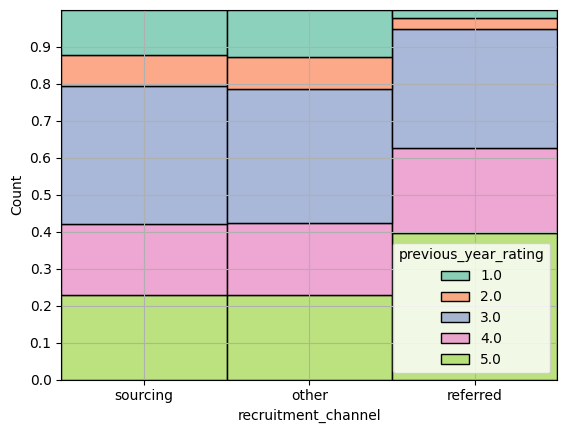

In [ ]:
sns.histplot(data, x = 'recruitment_channel', hue = 'previous_year_rating', multiple='fill', discrete=True, palette='Set2')
plt.grid()
plt.yticks(np.arange(0,1,.1))
plt.show()

- Referred employees have a median previous year rating of 4. Others have 3.

### Filling null values for avg_training_score

In [ ]:
# Median is taken per department
for i in data['department'].unique():
    data['avg_training_score'].loc[(data['department'] == i) & (data['avg_training_score'].isna())] = data.loc[data['department'] == i]['avg_training_score'].median()
data.isna().sum()

employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score         0
is_promoted                0
dtype: int64

### Filling null values for previous_year_rating

In [ ]:
for i in data.loc[data['previous_year_rating'].isnull()].index:
    if data.at[i, 'recruitment_channel'] == 'referred' or data.at[i, 'avg_training_score'] >= 90:
        data.at[i, 'previous_year_rating'] = 4.0
    else:
        data.at[i, 'previous_year_rating'] = 3.0
data.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
is_promoted             0
dtype: int64

## Encoding and Scaling

In [ ]:
X = data.drop(['is_promoted', 'employee_id'], axis=1)
y = data['is_promoted']

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
transformer = make_column_transformer(
    (OneHotEncoder(drop='first', sparse_output=False), ['department', 'region', 'education', 'gender', 'recruitment_channel']),
    (StandardScaler(), ['age', 'previous_year_rating', 'length_of_service', 'avg_training_score', 'no_of_trainings']),
    remainder='passthrough')

transformed = transformer.fit_transform(X)
transformed.shape

(54808, 52)

In [ ]:
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out(transformer.feature_names_in_))
transformed_df.head()

,onehotencoder__department_Finance,onehotencoder__department_HR,onehotencoder__department_Legal,onehotencoder__department_Operations,onehotencoder__department_Procurement,onehotencoder__department_R&D,onehotencoder__department_Sales & Marketing,onehotencoder__department_Technology,onehotencoder__region_region_10,onehotencoder__region_region_11,...,onehotencoder__education_Master's & above,onehotencoder__gender_m,onehotencoder__recruitment_channel_referred,onehotencoder__recruitment_channel_sourcing,standardscaler__age,standardscaler__previous_year_rating,standardscaler__length_of_service,standardscaler__avg_training_score,remainder__no_of_trainings,remainder__awards_won
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.038093,1.392553,0.711461,-1.079084,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-0.636174,1.392553,-0.460068,-0.253256,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,-0.096760,-0.253174,0.418579,-1.004009,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.577506,-1.898901,1.297225,-1.004009,2.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.386626,-0.253174,-1.045832,0.722723,1.0,0.0


## Checking accuracy with models

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_df, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold, cross_val_score

Logistic Regression
93.61430395913155
[[10040    14]
 [  686   222]]


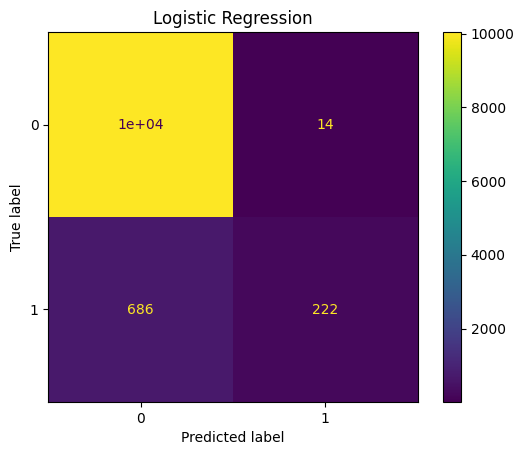

Random Forset Classifier
93.39536580915892
[[10002    52]
 [  672   236]]


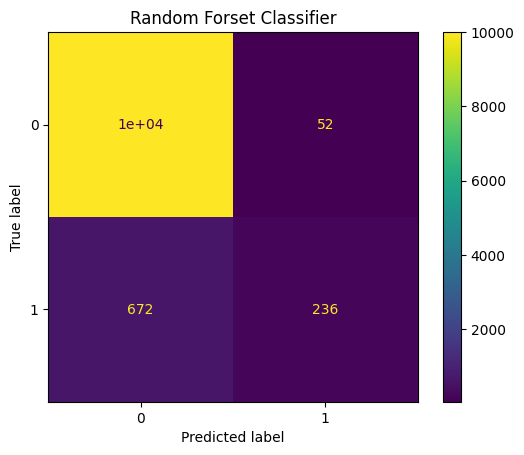

KNeighbors Classifier
92.03612479474549
[[10025    29]
 [  844    64]]


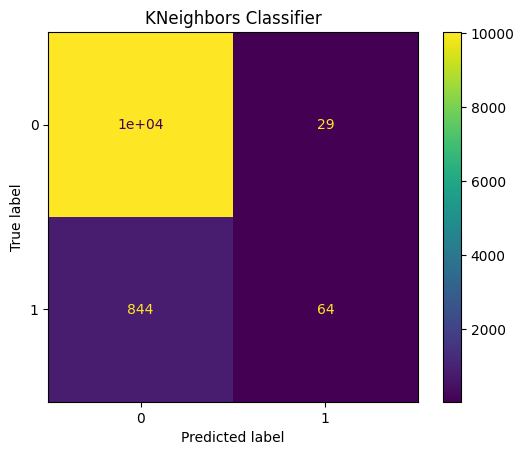

Gradient Boosting Classifier
93.76026272577997
[[10035    19]
 [  665   243]]


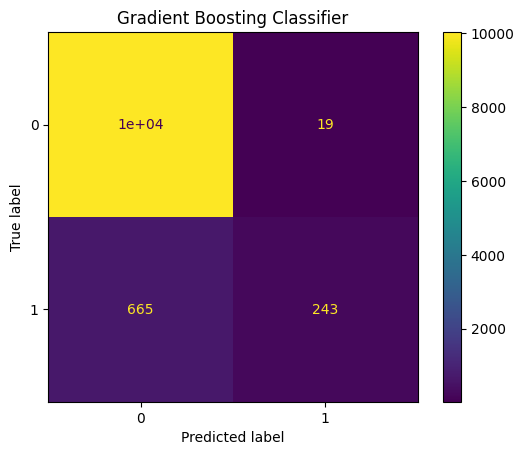

XG Boost
94.12515964240103
[[10024    30]
 [  614   294]]


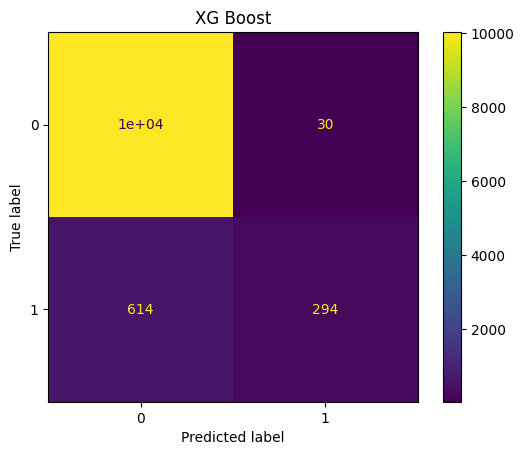

Support Vector Machines
92.86626528005839
[[10050     4]
 [  778   130]]


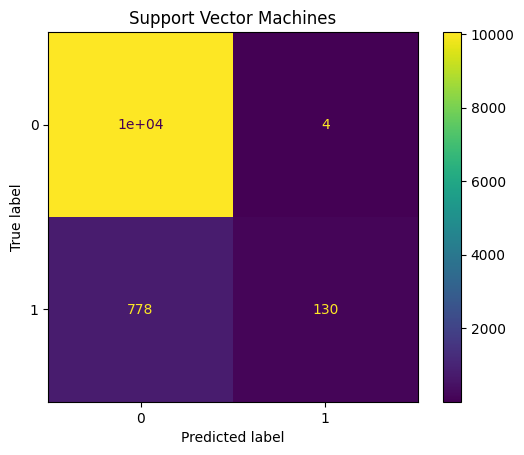

Decision Tree
88.16821747856231
[[9320  734]
 [ 563  345]]


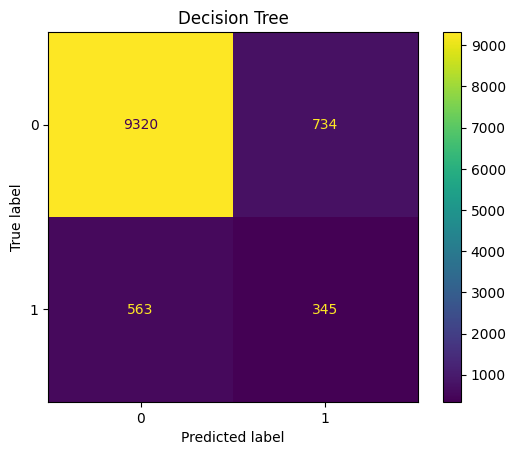

AdaBoost Classifier
92.99397920087576
[[10028    26]
 [  742   166]]


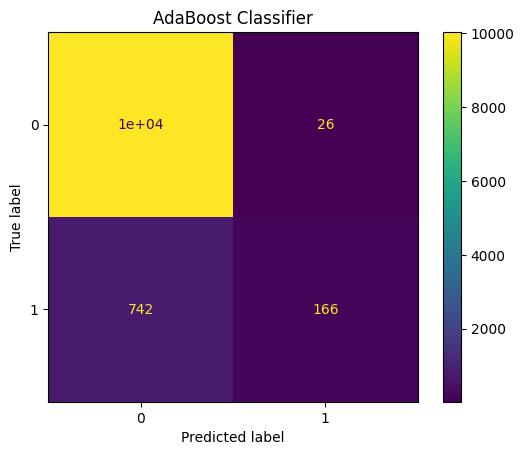

In [ ]:
value= [LogisticRegression(), RandomForestClassifier(), KNeighborsClassifier(),GradientBoostingClassifier(),XGBClassifier(),SVC(),DecisionTreeClassifier(), AdaBoostClassifier()]

key= ['Logistic Regression', 'Random Forset Classifier',   'KNeighbors Classifier','Gradient Boosting Classifier','XG Boost','Support Vector Machines','Decision Tree','AdaBoost Classifier']

models= dict(zip(key,value))
accuracy_scores=[]
for key,value in models.items():
    value.fit(X_train,y_train)
    y_pred= value.predict(X_test)
    accuracy= accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(key)
    print(accuracy*100)
    conf = confusion_matrix(y_test, y_pred)
    print(conf)
    ConfusionMatrixDisplay(confusion_matrix=conf).plot()
    plt.title(key)
    plt.show()

## Feature Selection - ANOVA

### ANOVA

In [ ]:
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.compose import make_column_transformer
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
fs = SelectKBest(f_classif, k=35)
X = data.drop(['is_promoted', 'employee_id'], axis=1)
y = data['is_promoted']
xgb = XGBClassifier()
transformer = make_column_transformer(
    (OneHotEncoder(sparse_output=False), ['region', 'gender', 'department', 'education', 'recruitment_channel']),
    (StandardScaler(), ['age', 'previous_year_rating', 'length_of_service', 'avg_training_score', 'no_of_trainings']),
    remainder='passthrough')
X = transformer.fit_transform(X)
X = pd.DataFrame(X, columns=transformer.get_feature_names_out())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_fs = fs.fit_transform(X_train, y_train)
anova=pd.Series(fs.scores_)
anova.index = X_train.columns
anova.sort_values(ascending=False)

remainder__awards_won                          1646.371775
standardscaler__avg_training_score             1469.266971
standardscaler__previous_year_rating           1089.497051
onehotencoder__region_region_4                   67.888517
onehotencoder__region_region_22                  65.547271
onehotencoder__department_Technology             44.247867
onehotencoder__department_Sales & Marketing      41.338077
onehotencoder__education_Master's & above        34.087338
onehotencoder__education_Bachelor's              31.987023
onehotencoder__region_region_7                   28.618792
standardscaler__no_of_trainings                  26.232831
onehotencoder__region_region_17                  25.607836
onehotencoder__region_region_25                  22.091341
onehotencoder__department_HR                     20.669143
onehotencoder__recruitment_channel_referred      20.193556
onehotencoder__region_region_32                  19.679076
onehotencoder__region_region_29                  18.9602

In [ ]:
print(X_train.columns[fs.get_support()])

Index(['onehotencoder__region_region_11', 'onehotencoder__region_region_17',
       'onehotencoder__region_region_20', 'onehotencoder__region_region_21',
       'onehotencoder__region_region_22', 'onehotencoder__region_region_23',
       'onehotencoder__region_region_24', 'onehotencoder__region_region_25',
       'onehotencoder__region_region_26', 'onehotencoder__region_region_28',
       'onehotencoder__region_region_29', 'onehotencoder__region_region_31',
       'onehotencoder__region_region_32', 'onehotencoder__region_region_33',
       'onehotencoder__region_region_34', 'onehotencoder__region_region_4',
       'onehotencoder__region_region_5', 'onehotencoder__region_region_6',
       'onehotencoder__region_region_7', 'onehotencoder__region_region_9',
       'onehotencoder__gender_m', 'onehotencoder__department_Analytics',
       'onehotencoder__department_HR', 'onehotencoder__department_Legal',
       'onehotencoder__department_Procurement',
       'onehotencoder__department_Sales 

Accuracy: 0.941890166028097
Precision: 0.9104046242774566
Recall: 0.34201954397394135
F-score: 0.49723756906077343


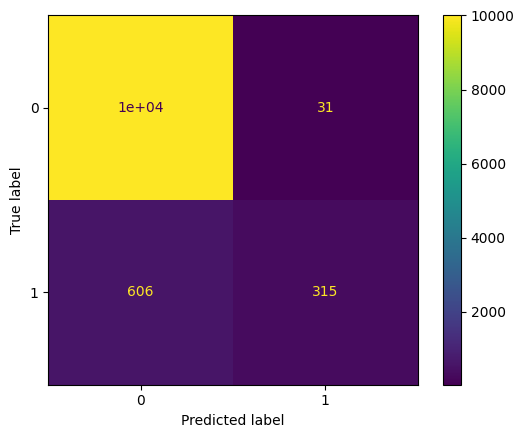

In [ ]:
xgb.fit(X_fs, y_train)
y_pred = xgb.predict(fs.transform(X_test))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F-score:', f1_score(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot()
plt.show()

### Feature Selection Conclusion
- We tried feature selection with ANOVA and Mutual Information and found that ANOVA was slightly better (94.18% accuracy for ANOVA and 94.13% for Mutual Information).
- The most prominant features are:
    1. Awards won
    2. Average Training Score
    3. Previous Year Rating
- We selected 35 features with the most ANOVA score.

## Resampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

### Random Oversampling


 0.2
Accuracy: 0.9373289545703338
Precision: 0.74375
Recall: 0.38762214983713356
F-score: 0.5096359743040685


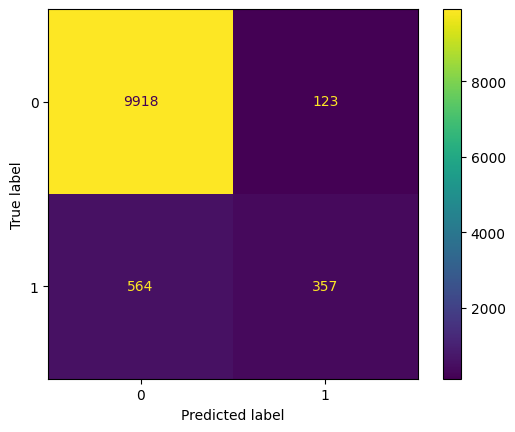


 0.4
Accuracy: 0.916256157635468
Precision: 0.50186799501868
Recall: 0.4375678610206297
F-score: 0.46751740139211134


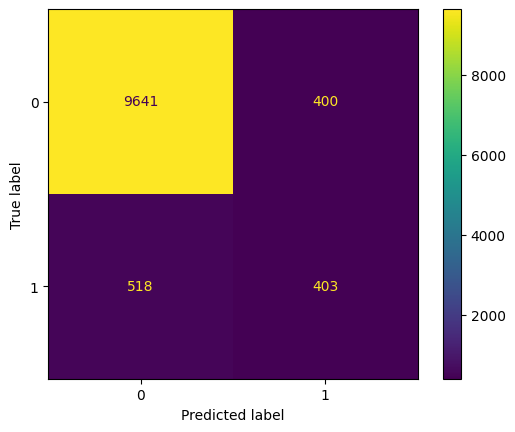


 0.6000000000000001
Accuracy: 0.8918080642218573
Precision: 0.3885618166526493
Recall: 0.501628664495114
F-score: 0.437914691943128


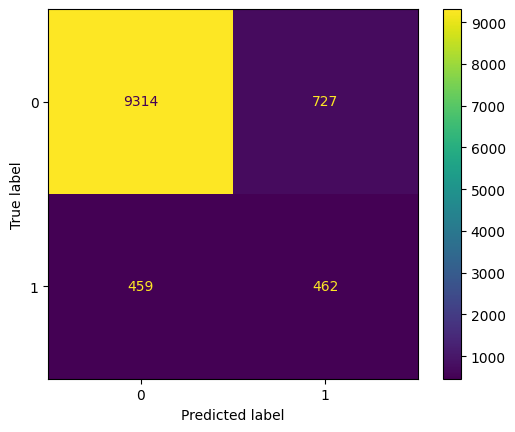


 0.8
Accuracy: 0.8578726509760992
Precision: 0.30638297872340425
Recall: 0.5472312703583062
F-score: 0.39282930631332813


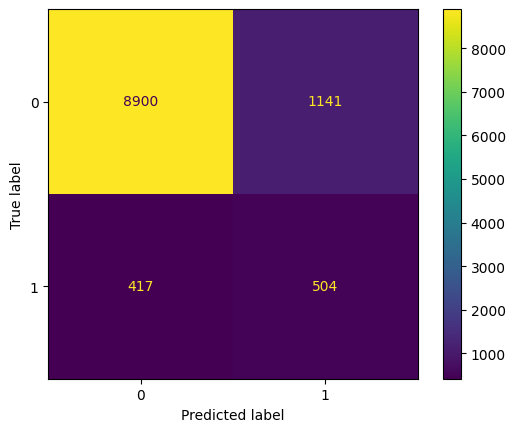


 1.0
Accuracy: 0.8241196861886517
Precision: 0.26238791882963663
Recall: 0.6036916395222585
F-score: 0.36578947368421055


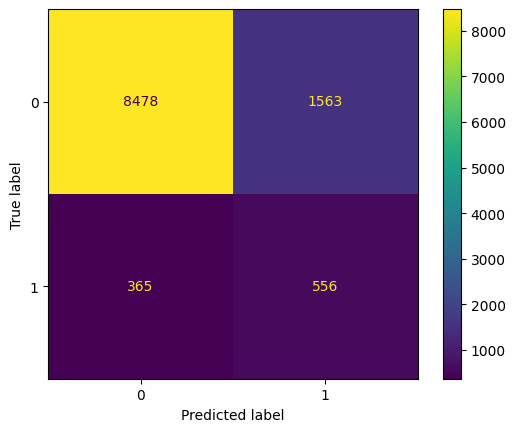

In [ ]:
for i in np.arange(0.2,1.2,0.2):
    print("\n", i)
    ros = RandomOverSampler(sampling_strategy=i)
    X_ros, y_ros = ros.fit_resample(X_fs, y_train)
    xgb.fit(X_ros, y_ros)
    y_pred = xgb.predict(fs.transform(X_test))
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))
    print('F-score:', f1_score(y_test, y_pred))
    ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot()
    plt.show()

### Random Undersampling


i =  0.2
Accuracy: 0.9362342638204707
Precision: 0.722
Recall: 0.3919652551574376
F-score: 0.5080928923293455


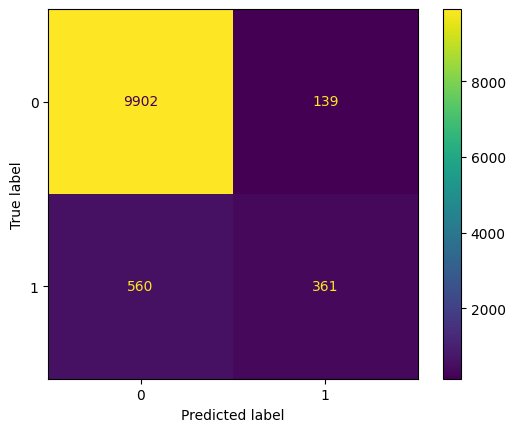


i =  0.4
Accuracy: 0.9063127166575442
Precision: 0.4456967213114754
Recall: 0.4723127035830619
F-score: 0.4586188719030047


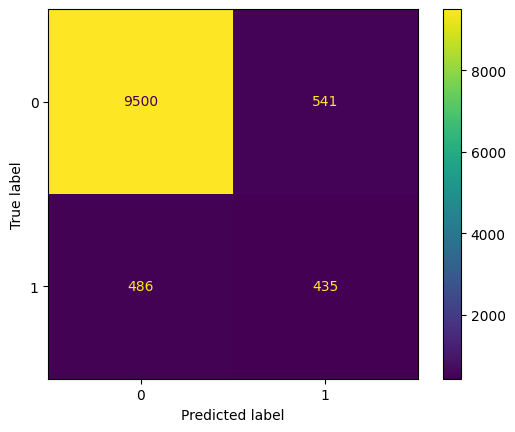


i =  0.6000000000000001
Accuracy: 0.867816091954023
Precision: 0.3283485045513654
Recall: 0.5483170466883822
F-score: 0.4107360715738105


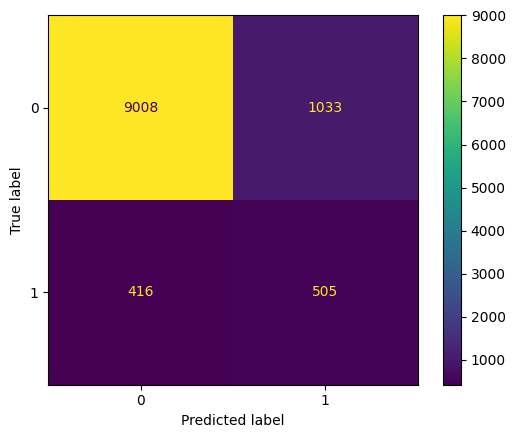


i =  0.8
Accuracy: 0.8160007297938332
Precision: 0.25
Recall: 0.5950054288816504
F-score: 0.35207195631223903


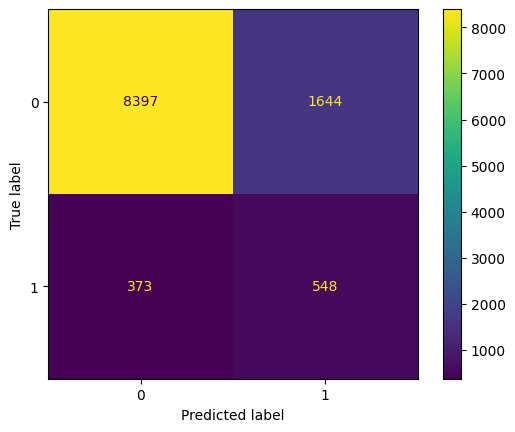


i =  1.0
Accuracy: 0.7675606641123882
Precision: 0.21385860007034824
Recall: 0.6601520086862106
F-score: 0.3230605738575983


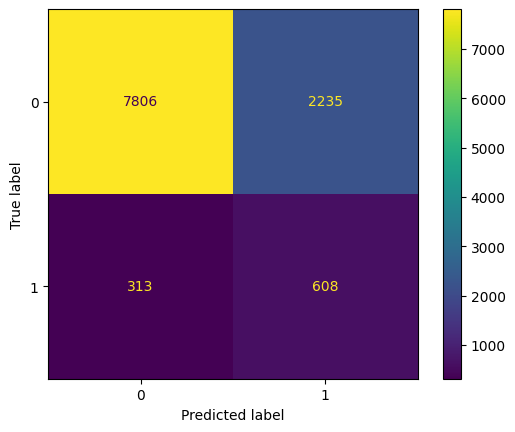

In [ ]:
for i in np.arange(0.2,1.2,0.2):
    print("\ni = ", i)
    rus = RandomUnderSampler(sampling_strategy=i)
    X_rus, y_rus = rus.fit_resample(X_fs, y_train)
    xgb.fit(X_rus, y_rus)
    y_pred = xgb.predict(fs.transform(X_test))
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))
    print('F-score:', f1_score(y_test, y_pred))
    ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot()
    plt.show()

### SMOTE


i =  0.2
Accuracy: 0.9420726144864076
Precision: 0.90625
Recall: 0.3463626492942454
F-score: 0.5011783189316575


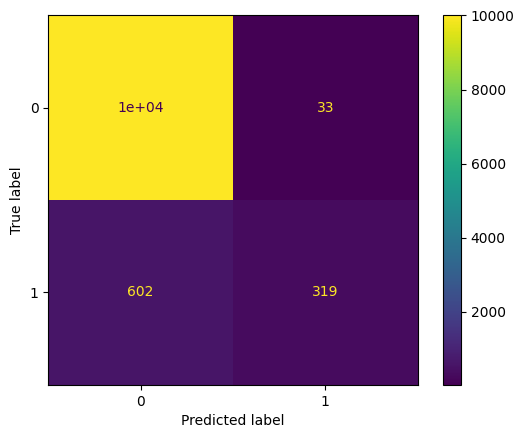


i =  0.4
Accuracy: 0.9405218025907681
Precision: 0.8831908831908832
Recall: 0.33659066232356133
F-score: 0.48742138364779874


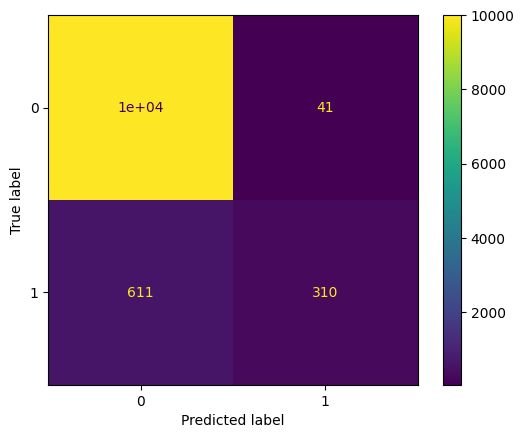


i =  0.6000000000000001
Accuracy: 0.9397007845283707
Precision: 0.8591160220994475
Recall: 0.33767643865363733
F-score: 0.4848012470771628


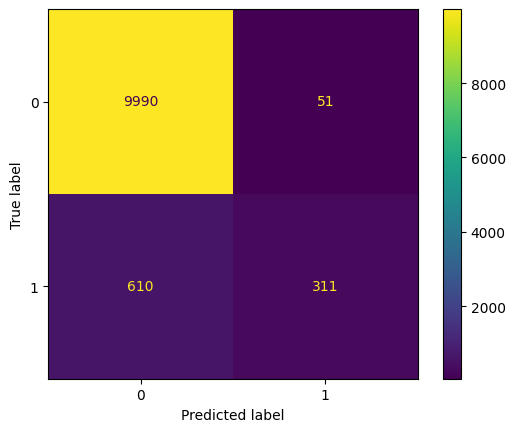


i =  0.8
Accuracy: 0.9390622149242839
Precision: 0.856338028169014
Recall: 0.3300760043431053
F-score: 0.4764890282131662


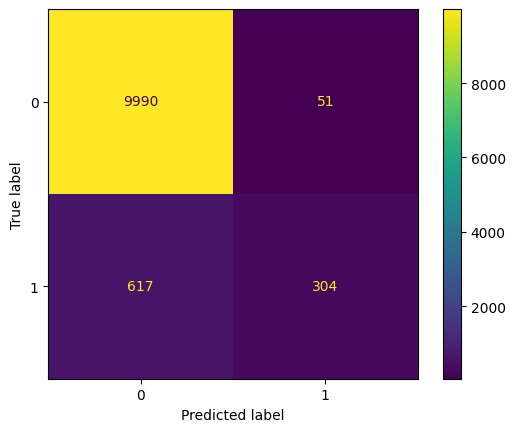


i =  1.0
Accuracy: 0.9367816091954023
Precision: 0.7923076923076923
Recall: 0.3355048859934853
F-score: 0.47139588100686497


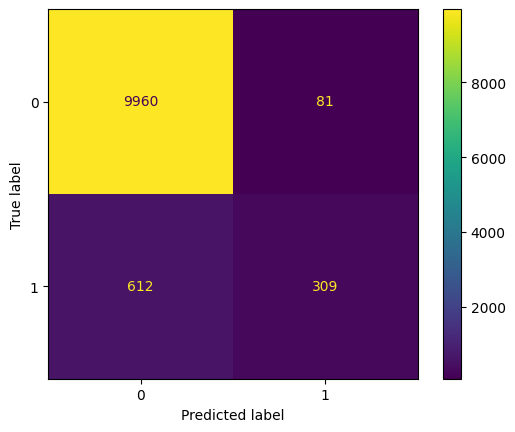

In [ ]:
for i in np.arange(0.2,1.2,0.2):
    print("\ni = ", i)
    sm = SMOTE(sampling_strategy=i)
    X_sm, y_sm = sm.fit_resample(X_fs, y_train)
    xgb.fit(X_sm, y_sm)
    y_pred = xgb.predict(fs.transform(X_test))
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))
    print('F-score:', f1_score(y_test, y_pred))
    ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot()
    plt.show()

### Resampling Conclusion
- Random Oversampling and Random Undersampling gives better recall scores, but accuracy, precision and f-score are significantly decreased.
- The people who are promoted are classified with more accuracy under these 2 resampling strategies, but the accuracy of classifying non-promoted people and therefore the overall accuracy of the model significantly decreases.
- When sampling strategy = 1, that is, when oversampling or undersampling is done to make number of promoted and non-promoted people equal in the training set, model accuracies for XGBoost go down to 82% for Random Oversampling and 76% for Random Undersampling.
- SMOTE resampling is not showing any significant changes in accuracies from non-resampled data.

Therefore we have decided not to use resampling.

# Parameter Tuning

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier, BaggingClassifier
from sklearn.tree import ExtraTreeClassifier

## MLP Classifier

In [ ]:
random_grid = {
    'hidden_layer_sizes': [(100,), (50,), (75,), (200,), (100,100,), (100,50,)],
    'activation': ['tanh', 'relu'],
    'alpha': [0.0001, 0.0005, 0.01, 0.05, 0.1, 0.5, 1],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'solver': ['lbfgs', 'adam']
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
model = MLPClassifier()
mlp_randomcv = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose = 2, random_state = 0, n_jobs = -1)
mlp_randomcv.fit(X_fs, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=MLPClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'activation': ['tanh', 'relu'],
                                        'alpha': [0.0001, 0.0005, 0.01, 0.05,
                                                  0.1, 0.5, 1],
                                        'hidden_layer_sizes': [(100,), (50,),
                                                               (75,), (200,),
                                                               (100, 100),
                                                               (100, 50)],
                                        'learning_rate': ['constant',
                                                          'invscaling',
                                                          'adaptive'],
                                        'solver': ['lbfgs', 'adam']},
                   random_state=0, verbose=2)

In [ ]:
mlp_randomcv.best_params_

{'solver': 'adam',
 'learning_rate': 'constant',
 'hidden_layer_sizes': (100, 50),
 'alpha': 0.1,
 'activation': 'tanh'}

In [ ]:
y_pred = mlp_randomcv.best_estimator_.predict(fs.transform(X_test))
print("Test set Scores:")
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F-score:', f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Test set Scores:
Accuracy: 0.9421638387155629
Precision: 0.9135446685878963
Recall: 0.34419109663409336
F-score: 0.5
[[10011    30]
 [  604   317]]


## ExtraTreesClassifier

In [ ]:
random_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [35, 40, 45],
    'min_samples_split': [3, 4, 5, 6],
    'max_features': [None]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
model = ExtraTreesClassifier()
et_randomcv = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose = 2, random_state = 0, n_jobs = -1)
et_randomcv.fit(X_fs, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


RandomizedSearchCV(cv=3, estimator=ExtraTreesClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [35, 40, 45],
                                        'max_features': [None],
                                        'min_samples_split': [3, 4, 5, 6]},
                   random_state=0, verbose=2)

In [ ]:
et_randomcv.best_params_

{'min_samples_split': 6,
 'max_features': None,
 'max_depth': 35,
 'criterion': 'gini'}

In [ ]:
y_pred = et_randomcv.best_estimator_.predict(fs.transform(X_test))
print("Test set Scores:")
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F-score:', f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Test set Scores:
Accuracy: 0.9333150884875023
Precision: 0.7021276595744681
Recall: 0.3583061889250814
F-score: 0.4744787922358016
[[9901  140]
 [ 591  330]]


## BaggingClassifier

In [ ]:
random_grid = {
    'n_estimators': [5, 10, 15, 50, 70, 100, 150, 200],
    'max_samples': [0.25, 0.5, 0.75, 1.0]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
model = BaggingClassifier()
bag_randomcv = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 4, verbose = 2, random_state = 0, n_jobs = -1)
bag_randomcv.fit(X_fs, y_train)

Fitting 4 folds for each of 32 candidates, totalling 128 fits


RandomizedSearchCV(cv=4, estimator=BaggingClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'max_samples': [0.25, 0.5, 0.75, 1.0],
                                        'n_estimators': [5, 10, 15, 50, 70, 100,
                                                         150, 200]},
                   random_state=0, verbose=2)

In [ ]:
bag_randomcv.best_params_

{'n_estimators': 150, 'max_samples': 0.25}

In [ ]:
y_pred = et_randomcv.best_estimator_.predict(fs.transform(X_test))
print("Test set Scores:")
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F-score:', f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Test set Scores:
Accuracy: 0.9333150884875023
Precision: 0.7021276595744681
Recall: 0.3583061889250814
F-score: 0.4744787922358016
[[9901  140]
 [ 591  330]]


## XGBoost Classifier

In [ ]:
random_grid = {
    'eta': [0.1, 0.3, 0.5, 0.75, 1],
    'max_depth': [5, 6, 7, 10],
    'min_child_weight': [1, 2, 3, 4],
    'max_delta_step': [0, 1, 2],
    'subsample': [0.5, 0.6, 0.75, 1],
    'tree_method': ['auto', 'approx', 'hist'],
    'reg_lambda': [0.3, 0.4, 0.5, 1],
    'alpha': [0, 0.5, 1],
    'scale_pos_weight': [1, 2, 4, 8, 10],
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
model = XGBClassifier()
xgb_randomcv = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose = 2, random_state = 0, n_jobs = -1)
xgb_randomcv.fit(X_fs, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           predictor=None, random_state=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': [0, 0.5, 1],
                                        'eta': [0.1, 0.3, 0.5, 0.75, 1],
                                        'max_delta_step': [0, 1, 2],
                                        'max_depth': [5, 6, 7, 10],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'reg_lambda': [0.3, 0.4, 0.5, 1],
                                        'scale_pos_weight': [1, 2, 4, 8, 10],
                                        'subsample': [0.5, 0.6, 0.75, 1],
                                        'tree_method': ['auto', 'approx',
                                                        'hist']},
                   random_state=0, verbose=2)

In [ ]:
xgb_randomcv.best_params_

{'tree_method': 'approx',
 'subsample': 0.5,
 'scale_pos_weight': 1,
 'reg_lambda': 1,
 'min_child_weight': 1,
 'max_depth': 7,
 'max_delta_step': 2,
 'eta': 0.1,
 'alpha': 0}

In [ ]:
y_pred = xgb_randomcv.best_estimator_.predict(fs.transform(X_test))
print("Test set Scores:")
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F-score:', f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Test set Scores:
Accuracy: 0.9417989417989417
Precision: 0.9300911854103343
Recall: 0.3322475570032573
F-score: 0.4895999999999999
[[10018    23]
 [  615   306]]


## SKfold

In [ ]:
X_fs = fs.transform(X)

### XGBoostClassifier

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
params = {'tree_method': 'approx',
 'subsample': 0.5,
 'scale_pos_weight': 1,
 'reg_lambda': 1,
 'min_child_weight': 1,
 'max_depth': 7,
 'max_delta_step': 2,
 'eta': 0.1,
 'alpha': 0}
xgb = XGBClassifier(**params)
skfold = StratifiedKFold(n_splits = 5)
skfold_score = cross_val_score(xgb, X_fs, y, cv = skfold)
print("CV Scores:", skfold_score)
print("Mean =", np.mean(skfold_score))
print("Range:", skfold_score.min(), "to", skfold_score.max())

CV Scores: [0.9405218  0.93869732 0.93860609 0.9419761  0.93933035]
Mean = 0.9398263329036697
Range: 0.9386060937785076 to 0.941976097071435


### MLPClassifier

In [ ]:
params = {'solver': 'adam',
 'learning_rate': 'constant',
 'hidden_layer_sizes': (100, 50),
 'alpha': 0.1,
 'activation': 'tanh'}
mlp = MLPClassifier(**params)
skfold = StratifiedKFold(n_splits = 5)
skfold_score = cross_val_score(mlp, X_fs, y, cv = skfold)
print("CV Scores:", skfold_score)
print("Mean =", np.mean(skfold_score))
print("Range:", skfold_score.min(), "to", skfold_score.max())

CV Scores: [0.93924466 0.93796752 0.93915344 0.94234103 0.94042514]
Mean = 0.9398263595360513
Range: 0.9379675241744208 to 0.942341027278533


### ExtraTreesClassifier

In [ ]:
params = {'min_samples_split': 9,
 'max_features': None,
 'max_depth': 20,
 'criterion': 'entropy'}
et = ExtraTreesClassifier(**params)
skfold = StratifiedKFold(n_splits = 5)
skfold_score = cross_val_score(et, X_fs, y, cv = skfold)
print("CV Scores:", skfold_score)
print("Mean =", np.mean(skfold_score))
print("Range:", skfold_score.min(), "to", skfold_score.max())

CV Scores: [0.93805875 0.93659916 0.93805875 0.94079007 0.93896542]
Mean = 0.9384944308610976
Range: 0.9365991607370918 to 0.9407900738983669


### BaggingClassifier

In [ ]:
params = {'n_estimators': 15, 'max_samples': 0.75}
bag = BaggingClassifier(**params)
skfold = StratifiedKFold(n_splits = 5)
skfold_score = cross_val_score(bag, X_fs, y, cv = skfold)
print("CV Scores:", skfold_score)
print("Mean =", np.mean(skfold_score))
print("Range:", skfold_score.min(), "to", skfold_score.max())

CV Scores: [0.92337165 0.92446634 0.92328042 0.92555424 0.92400328]
Mean = 0.9241351862346676
Range: 0.9232804232804233 to 0.9255542377520299
